# Homework #1

Remember: You must ingest the data to your notebooks directly from the data server. Also, don't write the same code with modifications to do similar things over and over again. Write a function.

## Question 1

Use [World Bank's Data Service](https://data.worldbank.org/) to retrieve

* Literacy rates of women (percentage of females ages 15 and above)
* Child mortality rate, under 5 year old. (per 1,000 live births)
* Gini index (Economic Inequality)

1. Plot each dataset for Turkey from earliest date available until this year.
2. Plot the same data for Greece, Bulgaria, Romania, Poland, Syria and Iran for the same periods. 
3. Do a scatter plot of female literacy rate against child mortality rate for Turkey. Do you see a relation? Which direction do you think the relation works?
4. Do a scatter plot of female literacy rate against gini index for Turkey. Do you see a relation? Which direction do you think the relation works?
5. Do a scatter plot of child mortality rate against the gini index for Turkey. Do you see a relation? Which direction do you think the relation works?

In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from urllib.request import urlopen
from pandas_datareader import data as pdr
from zipfile import ZipFile
from io import BytesIO
from xmltodict import parse

In order to extract the data, I define a **get_xml** function whose job is the get the url and xml file name as inputs and returns a list with the country,area name, year and (if available) value.

In [233]:
def get_xml(url,xmlname):
    with urlopen(url) as url:
        zfile = ZipFile(BytesIO(url.read()))
        print(zfile.filelist)
        data = parse(zfile.open(xmlname).read())
    final = [{x['@name']: x['#text'] for x in y['field'] if '#text' in x.keys()} for y in data['Root']['data']['record']]
    return final

In [239]:
literacy_rate = get_xml('https://api.worldbank.org/v2/en/indicator/SE.ADT.LITR.FE.ZS?downloadformat=xml','API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml')
mortality_rate = get_xml('https://api.worldbank.org/v2/en/indicator/SP.DYN.IMRT.IN?downloadformat=xml','API_SP.DYN.IMRT.IN_DS2_en_xml_v2_4651437.xml')
gini_index = get_xml('https://api.worldbank.org/v2/en/indicator/SI.POV.GINI?downloadformat=xml','API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml')

[<ZipInfo filename='API_SE.ADT.LITR.FE.ZS_DS2_en_xml_v2_4651512.xml' compress_type=deflate file_size=4768054 compress_size=104459>]
[<ZipInfo filename='API_SP.DYN.IMRT.IN_DS2_en_xml_v2_4651437.xml' compress_type=deflate file_size=4563868 compress_size=118957>]
[<ZipInfo filename='API_SI.POV.GINI_DS2_en_xml_v2_4639705.xml' compress_type=deflate file_size=3806005 compress_size=72157>]


# Q1.1 Plotting Data
Below, there are 2 functions to make the retrieving filtered data and plotting process faster. Working with functions is necessary because later on, similar procedures are made for different countries, therefore defining functions is important

* xml_to_df function takes the **data** as a pandas data frame and the **country** as a string. Then, creates a new dataframe df1. Checking each section in data it filters the one with the wanted country, and if that section has a value (because some of the data does not contain a value) it creates a new row with the country name, year, value and appends that to the newly created data frame df1.

Before returning df1 to the user, I made sure value and year elements are float, in order to have a proper plot later.

* plot_func is a function that takes a pandas data frame data and plots it by year vs value. 

In [241]:
def xml_to_df(data,country):
    df1 = pd.DataFrame(columns=['Country','Year','Value'])
    for i in range(len(data)):
        if data[i]['Country or Area']==country:
            if 'Value' in data[i]:
                new_row = {'Country':data[i]['Country or Area'], 
                           'Year':data[i]['Year'], 
                           'Value':data[i]['Value']}
                df1 = df1.append(new_row, ignore_index=True)
    df1 = df1.astype({'Value':'float','Year':'int64'})
    return df1

In [242]:
def plot_func(data):
    x=data['Year']
    y=data['Value']
    plt.figure(figsize=(30, 15))
    plt.plot(x, y)
    plt.xlabel("Year")
    plt.ylabel("Value")

Here is the Literacy rates of women (percentage of females ages 15 and above) in Turkey plot. Year vs value. It is mostly increasing

Text(0.5, 1.0, 'Literacy Rates of Women in Turkey')

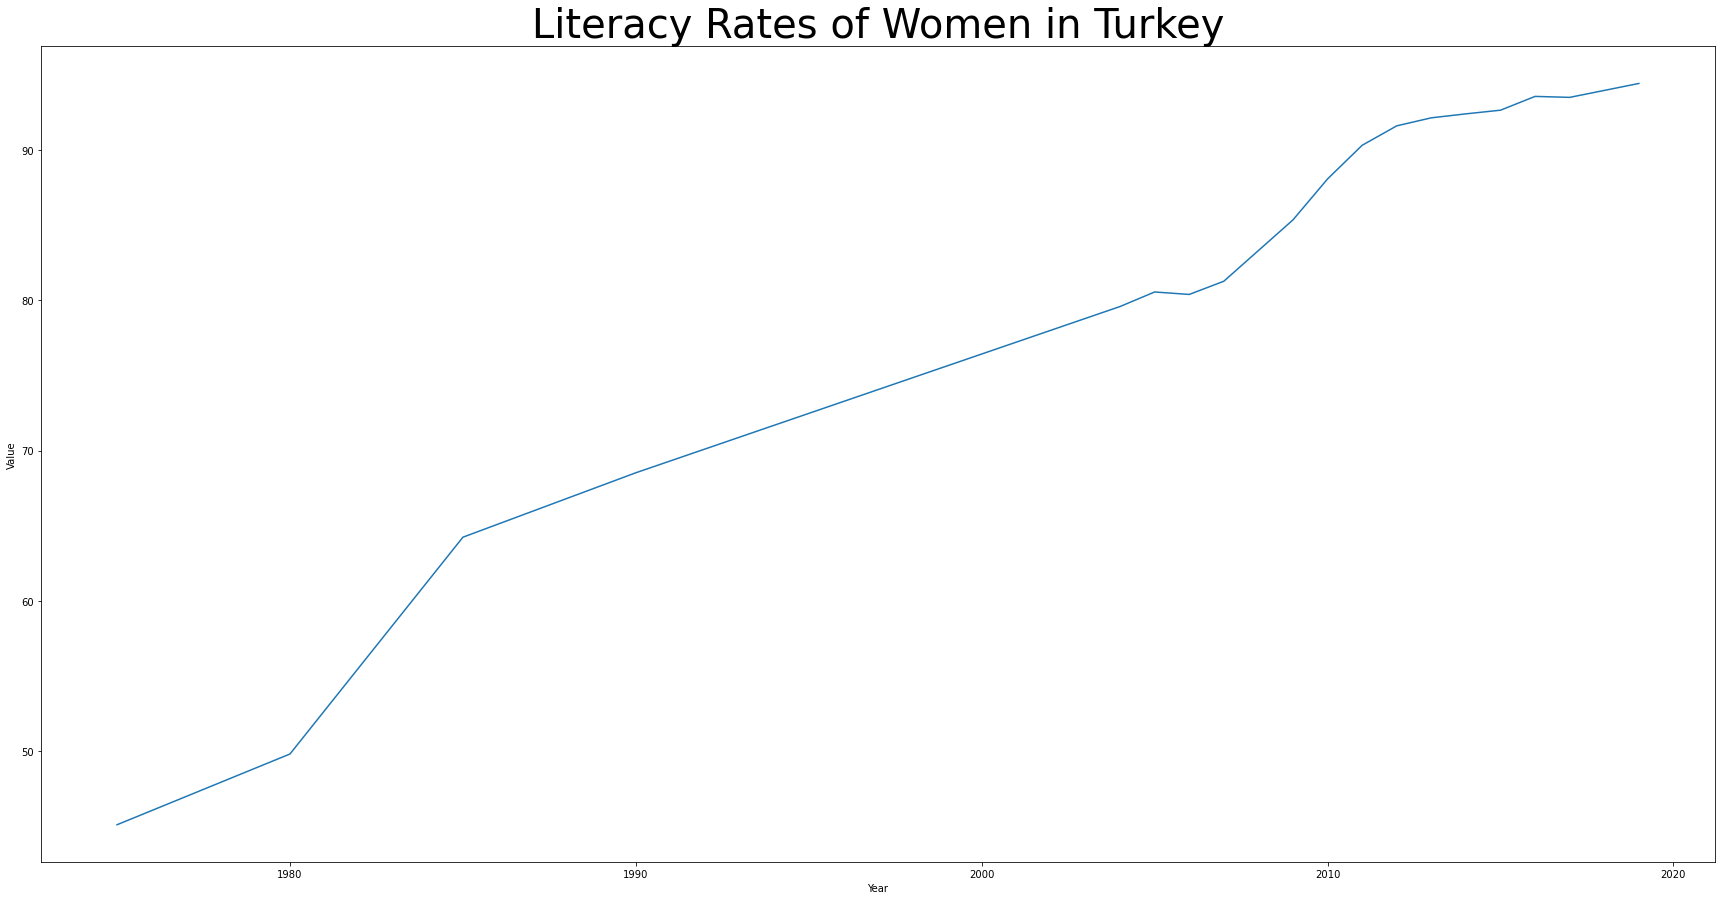

In [243]:
lit_data_tr=xml_to_df(literacy_rate,'Turkiye')
plot_func(lit_data_tr)
plt.title('Literacy Rates of Women in Turkey',fontsize=40)

Next, is the Child mortality rate, under 5 year old. (per 1,000 live births) in Turkey plot. Year vs value. It is decreasing

Text(0.5, 1.0, 'Mortality Rates of Children in Turkey')

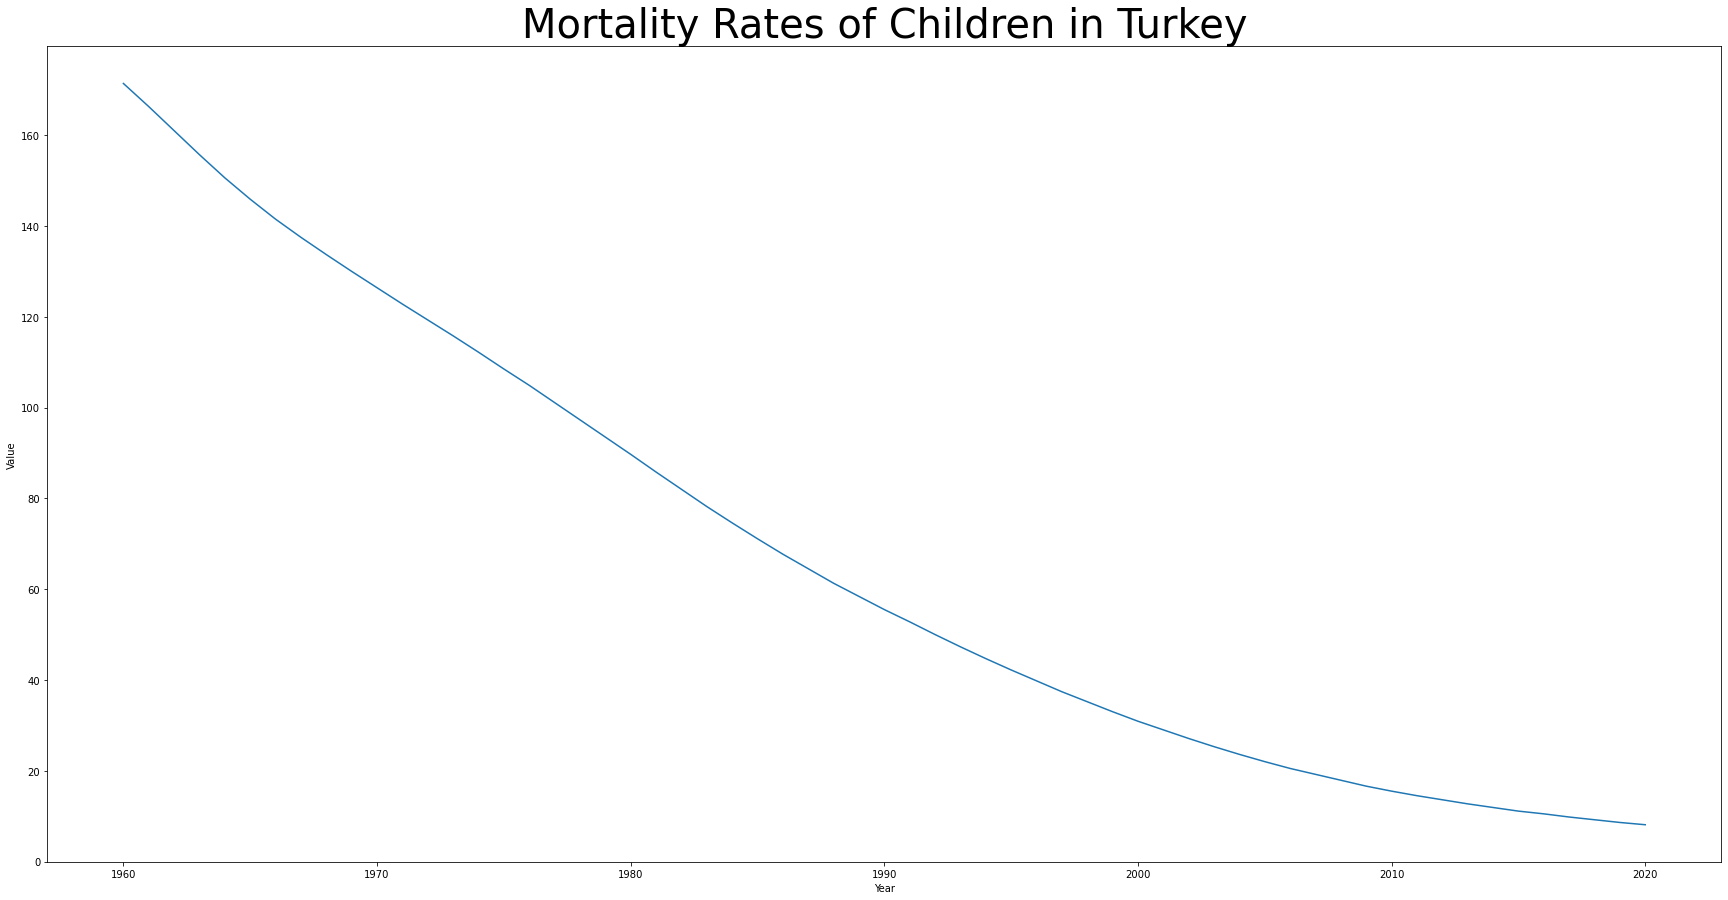

In [244]:
mort_data_tr=xml_to_df(mortality_rate,'Turkiye')
plot_func(mort_data_tr)
plt.title('Mortality Rates of Children in Turkey',fontsize=40)

Lastly, is the gini index in Turkey plot. Year vs value. Sometimes it is increasing, decreasing or even stable-like.

Text(0.5, 1.0, 'Gini Index in Turkey')

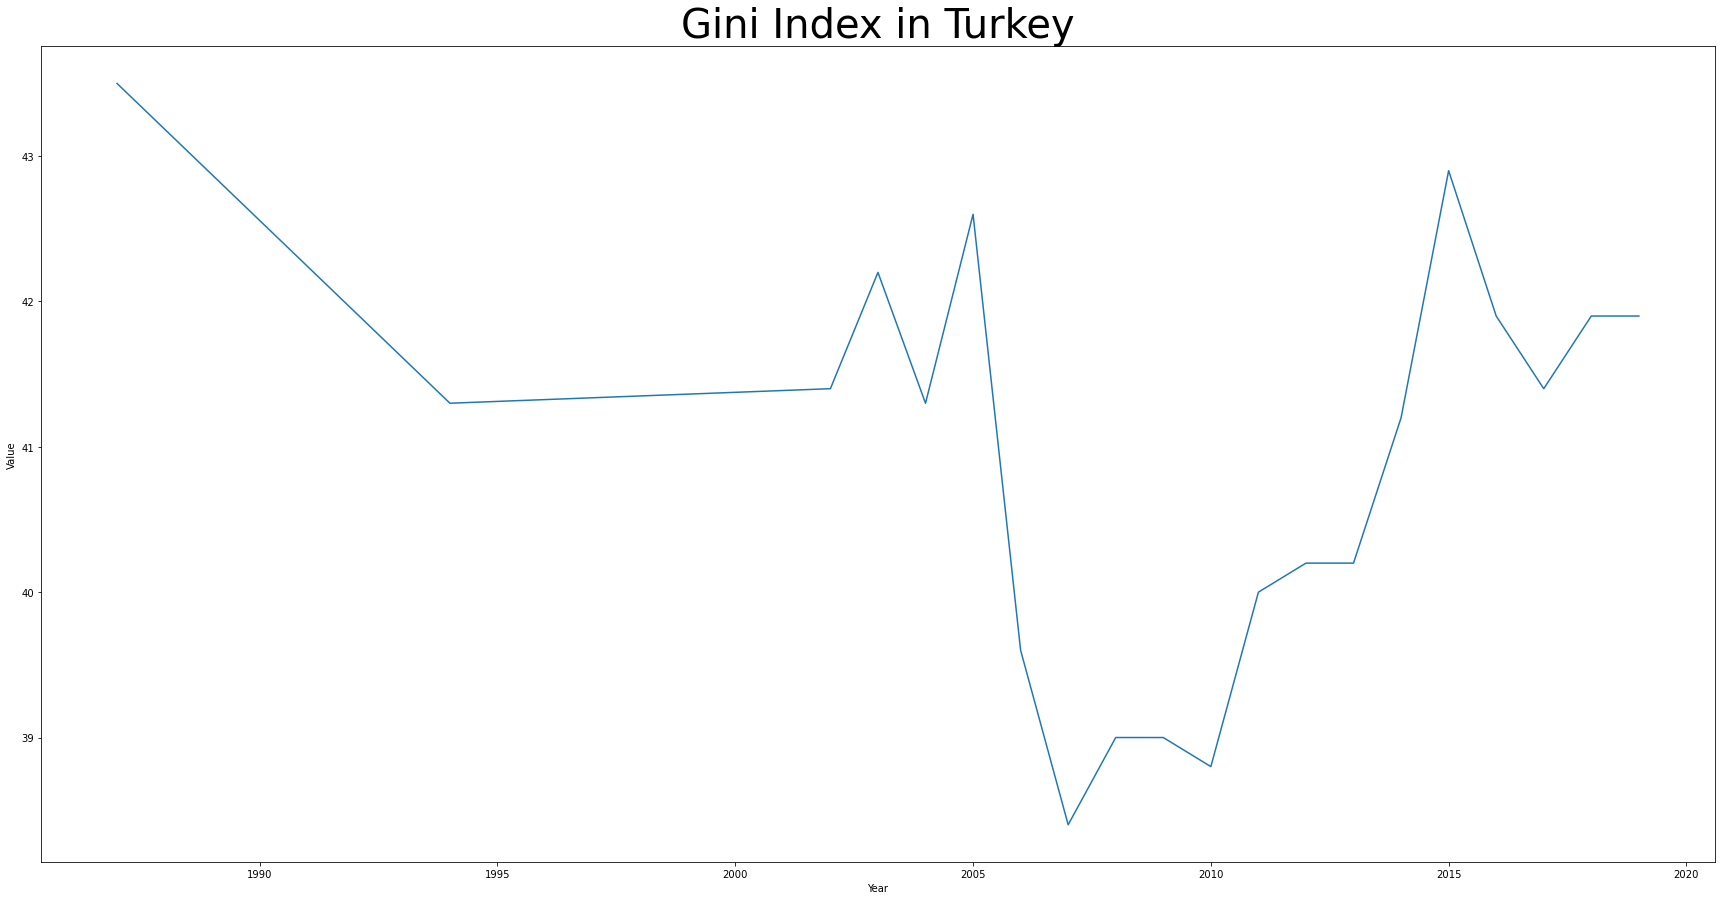

In [245]:
gini_data_tr=xml_to_df(gini_index,'Turkiye')
plot_func(gini_data_tr)
plt.title('Gini Index in Turkey',fontsize=40)

# Q1.2 Plotting Data For Different Countries

Thanks to the functions that were created previously, plotting same data (literacy rate for women, mortality rate for children and gini index) for Greece, Bulgaria, Romania, Poland, Syria and Iran is a fast process.

Text(0.5, 1.0, 'Literacy Rates of Women in Iran')

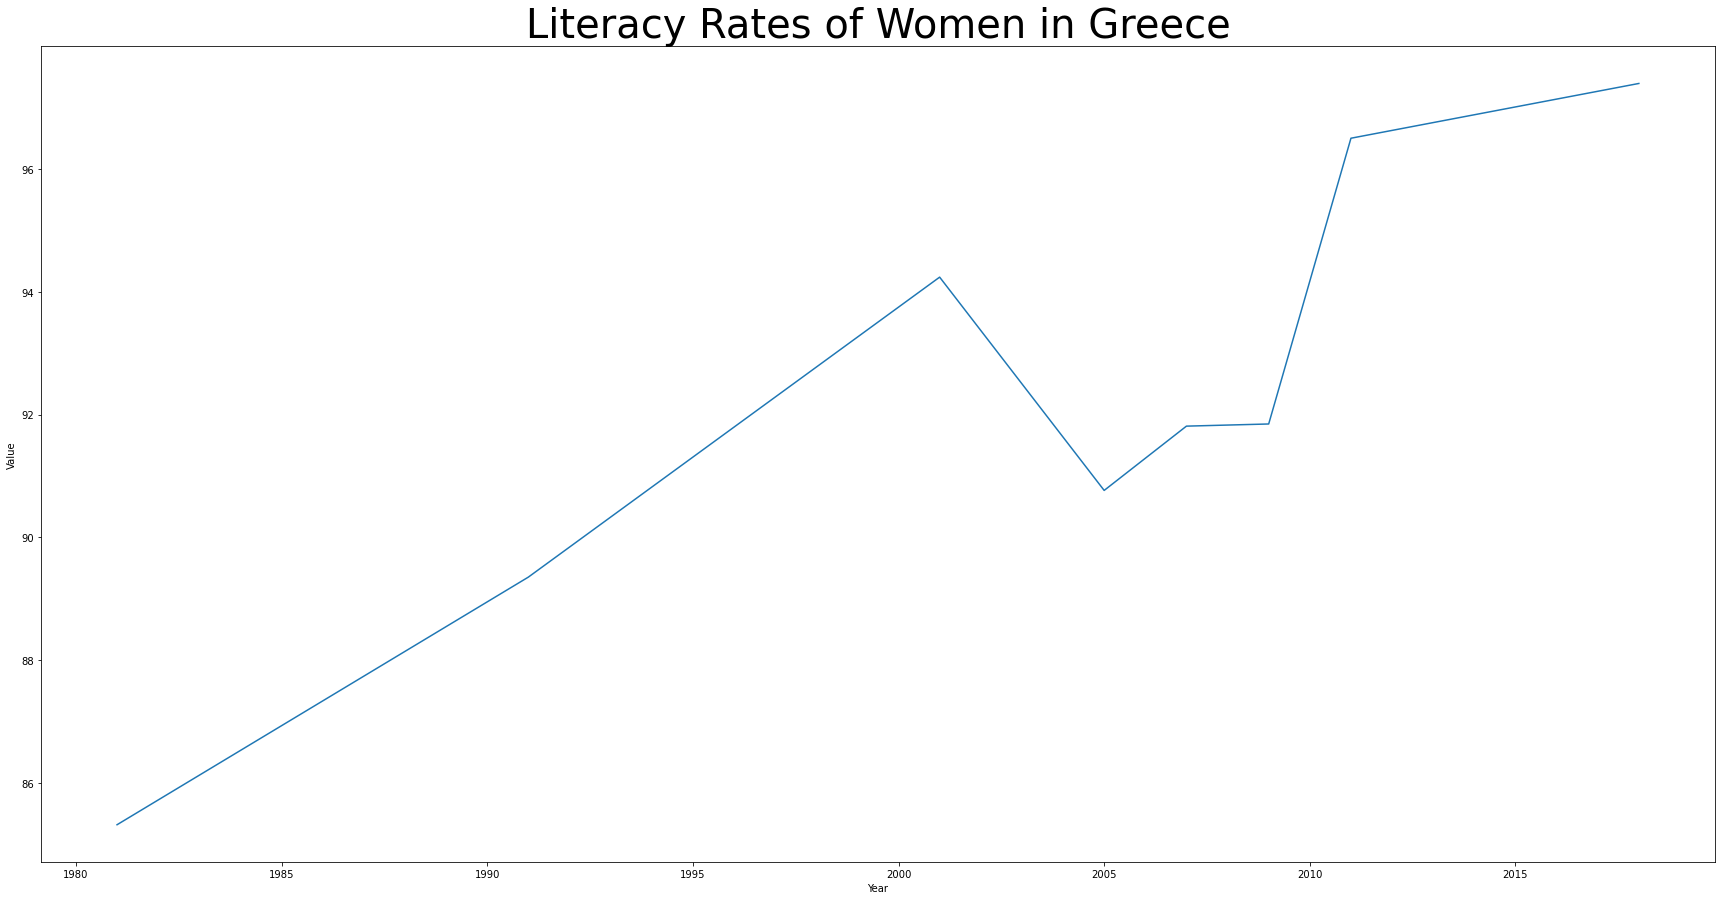

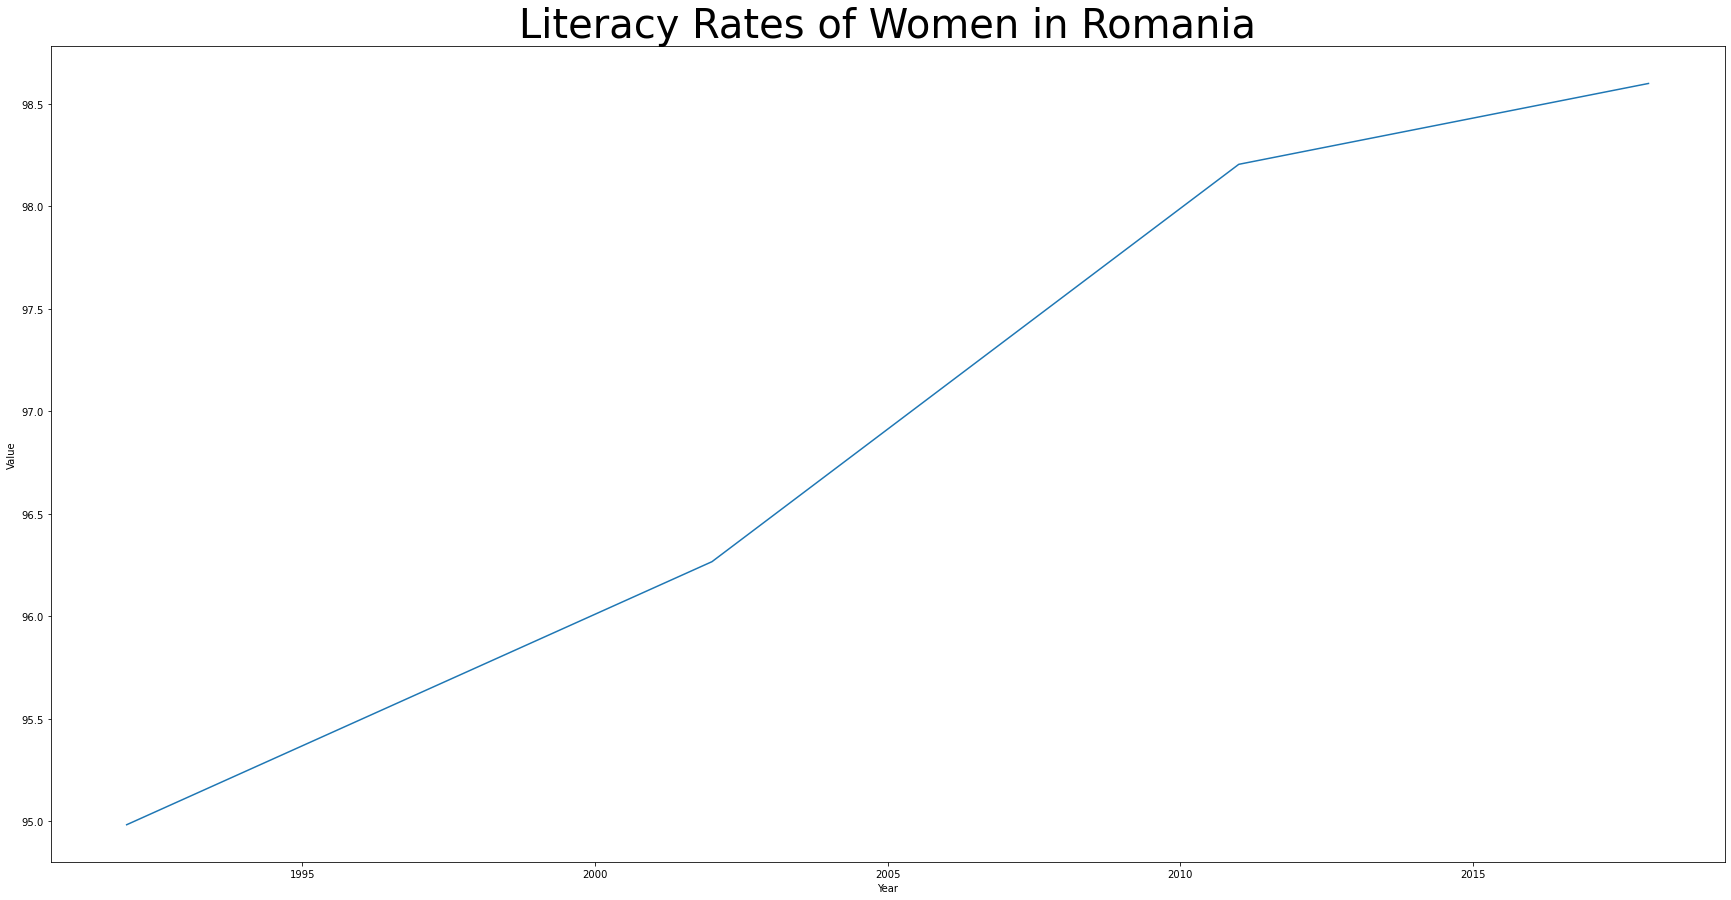

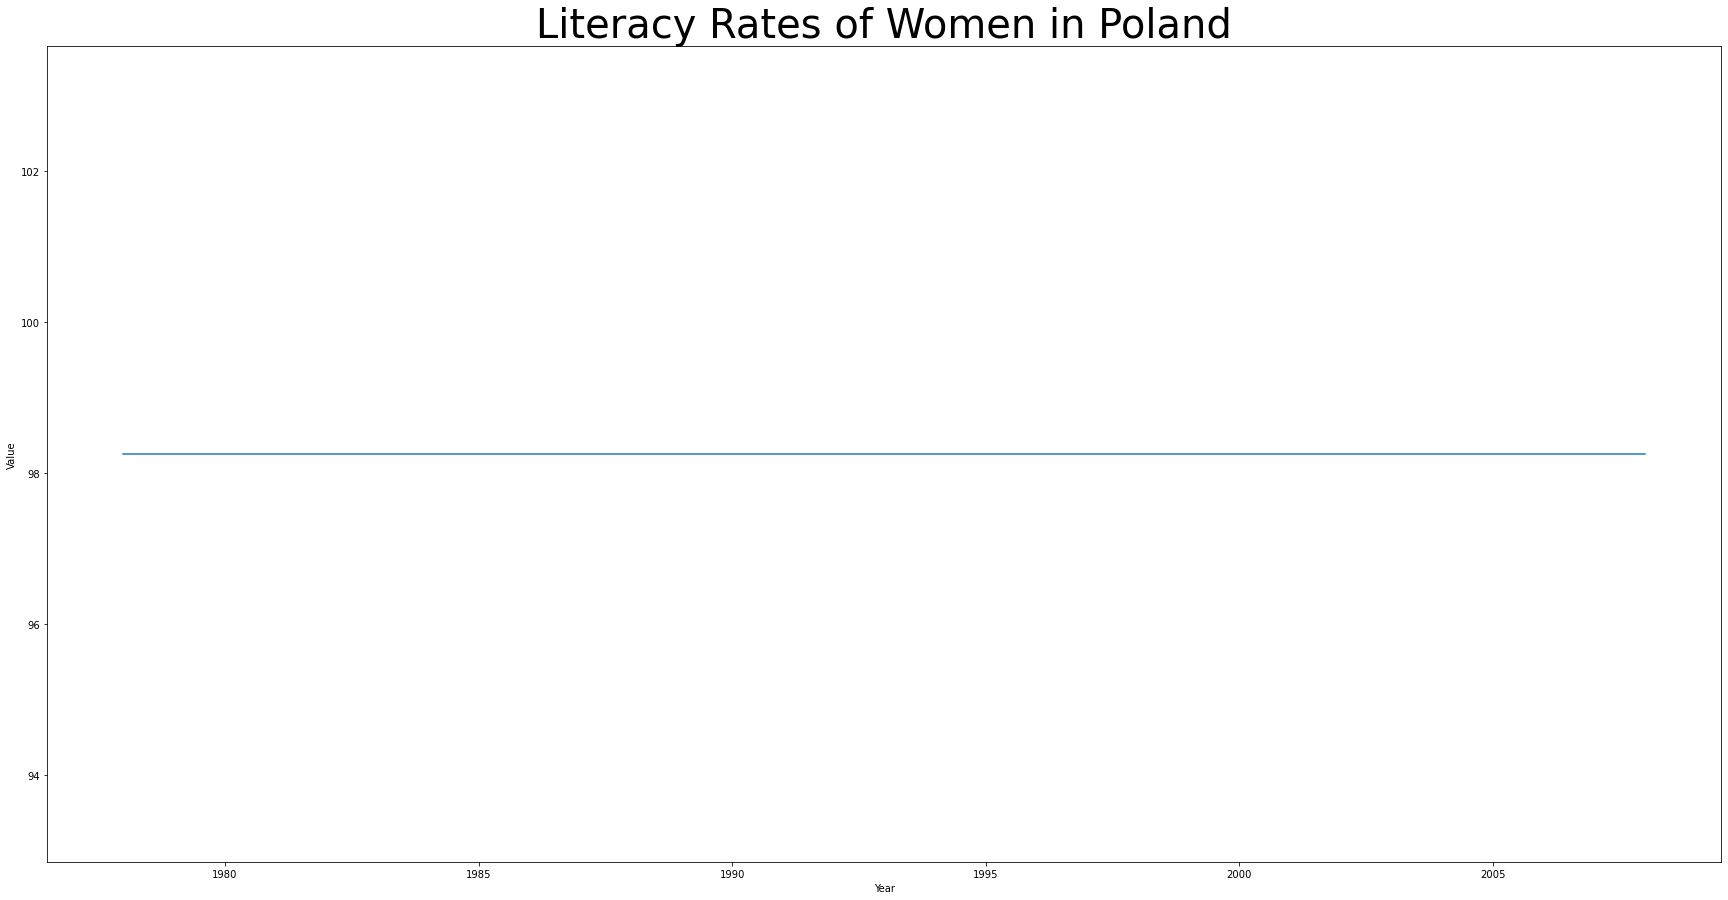

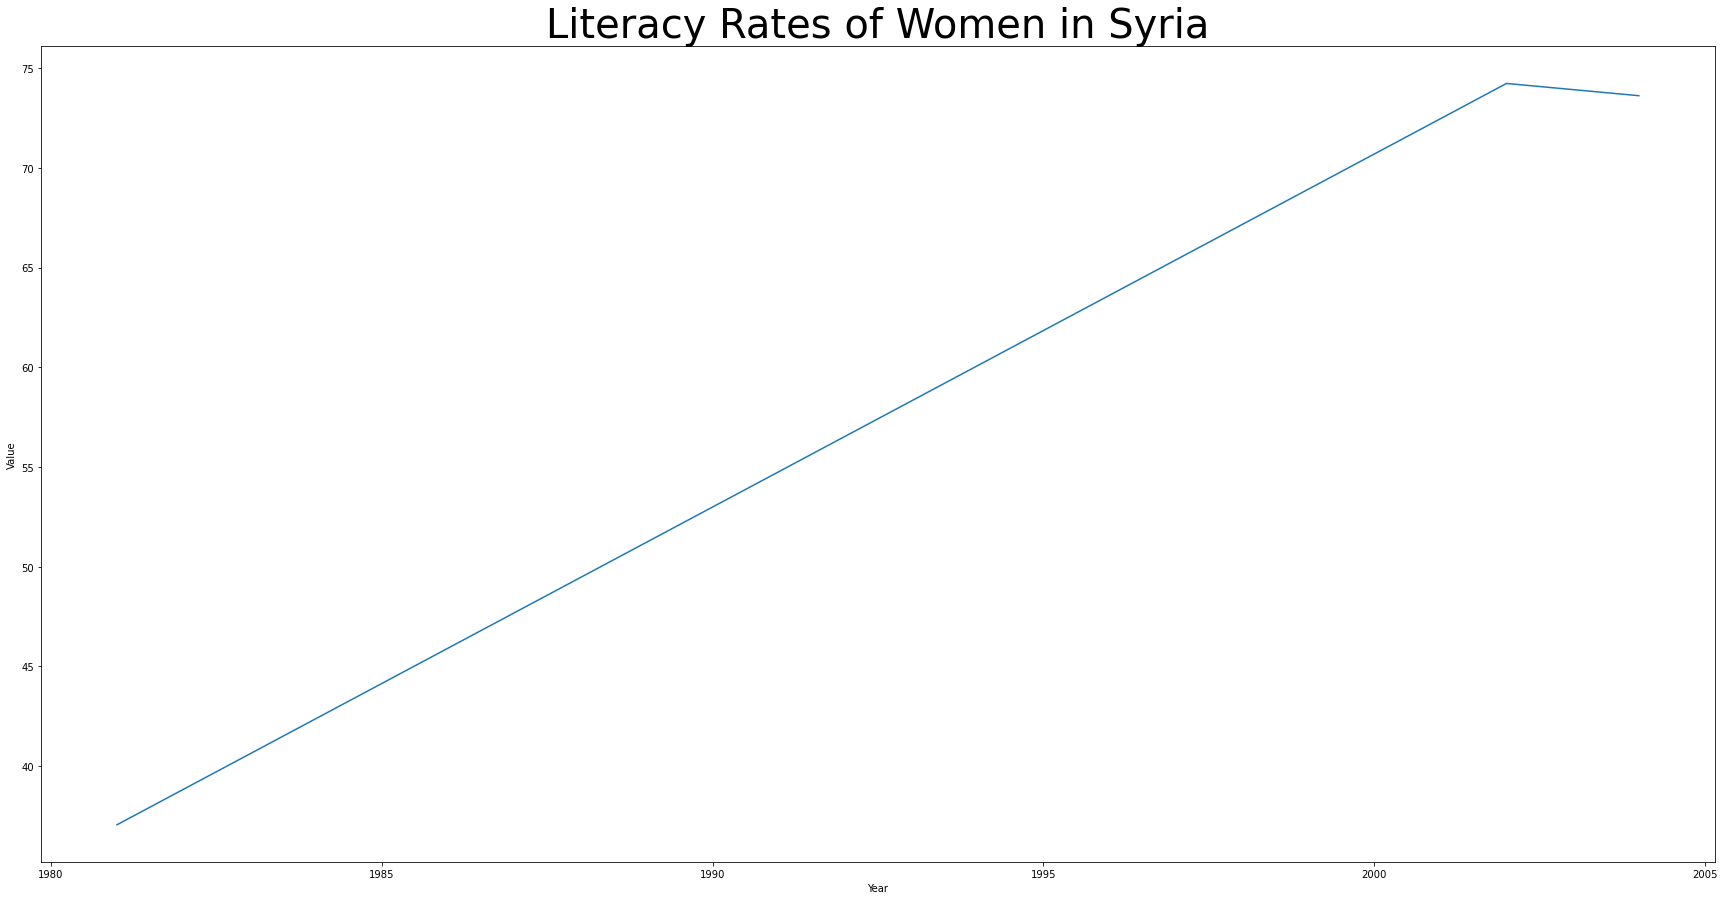

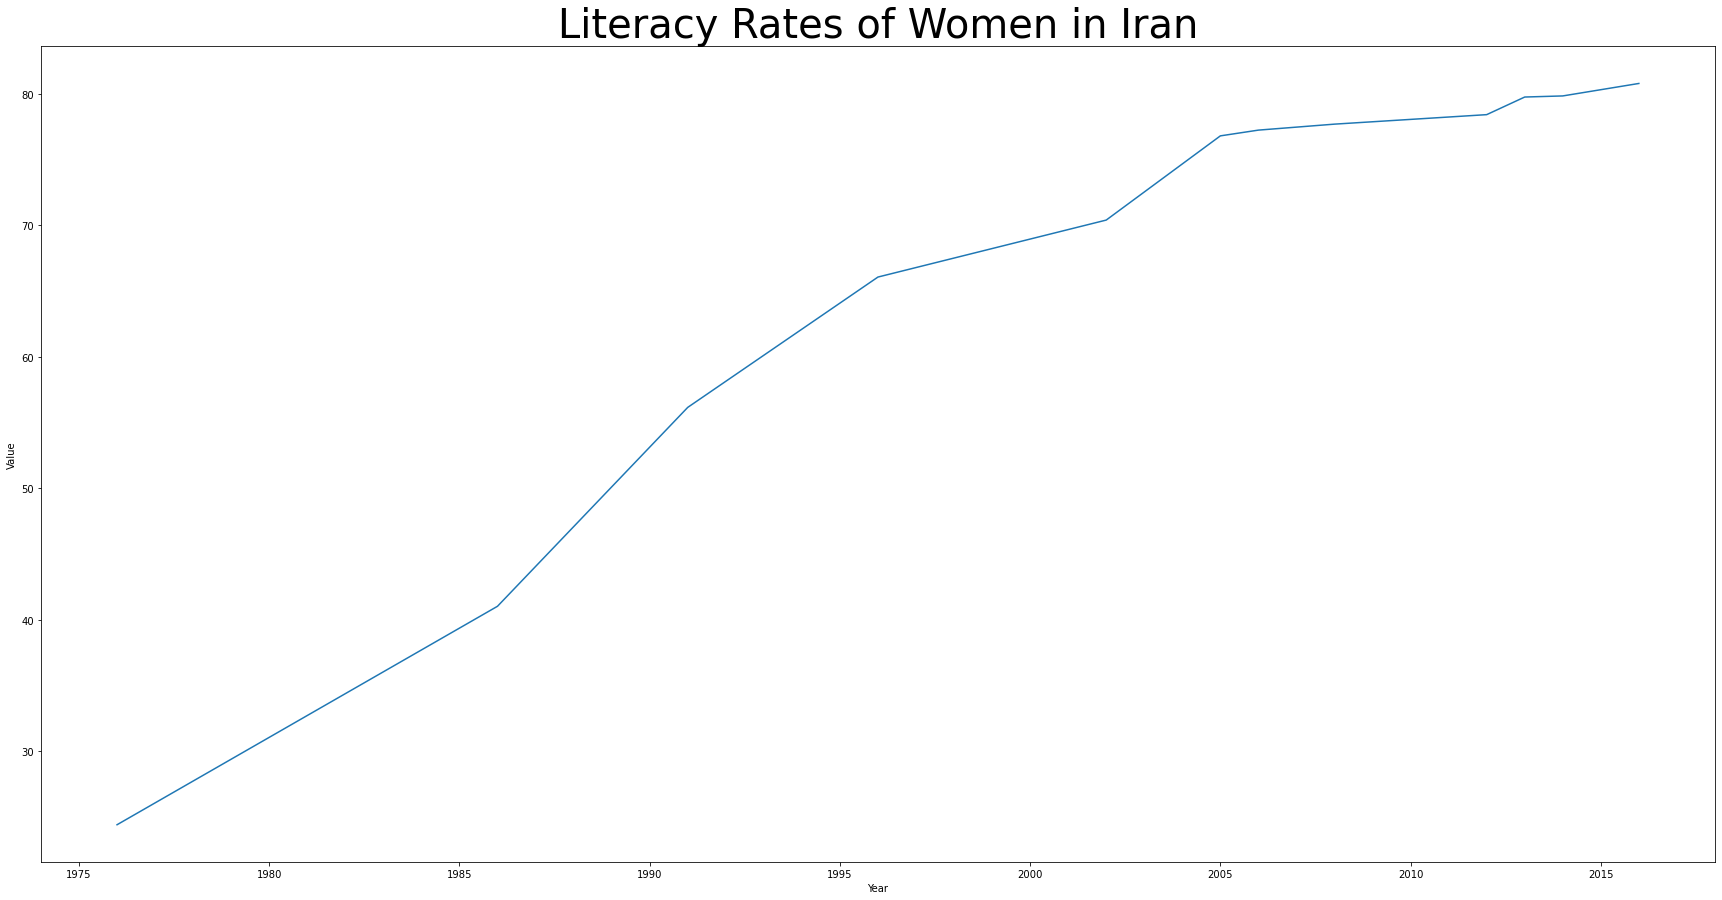

In [246]:
lit_data_grc=xml_to_df(literacy_rate,'Greece')
plot_func(lit_data_grc)
plt.title('Literacy Rates of Women in Greece',fontsize=40)

lit_data_rou=xml_to_df(literacy_rate,'Romania')
plot_func(lit_data_rou)
plt.title('Literacy Rates of Women in Romania',fontsize=40)

lit_data_pol=xml_to_df(literacy_rate,'Poland')
plot_func(lit_data_pol)
plt.title('Literacy Rates of Women in Poland',fontsize=40)

lit_data_syr=xml_to_df(literacy_rate,'Syrian Arab Republic')
plot_func(lit_data_syr)
plt.title('Literacy Rates of Women in Syria',fontsize=40)

lit_data_irn=xml_to_df(literacy_rate,'Iran, Islamic Rep.')
plot_func(lit_data_irn)
plt.title('Literacy Rates of Women in Iran',fontsize=40)

Text(0.5, 1.0, 'Mortality Rates of Women in Iran')

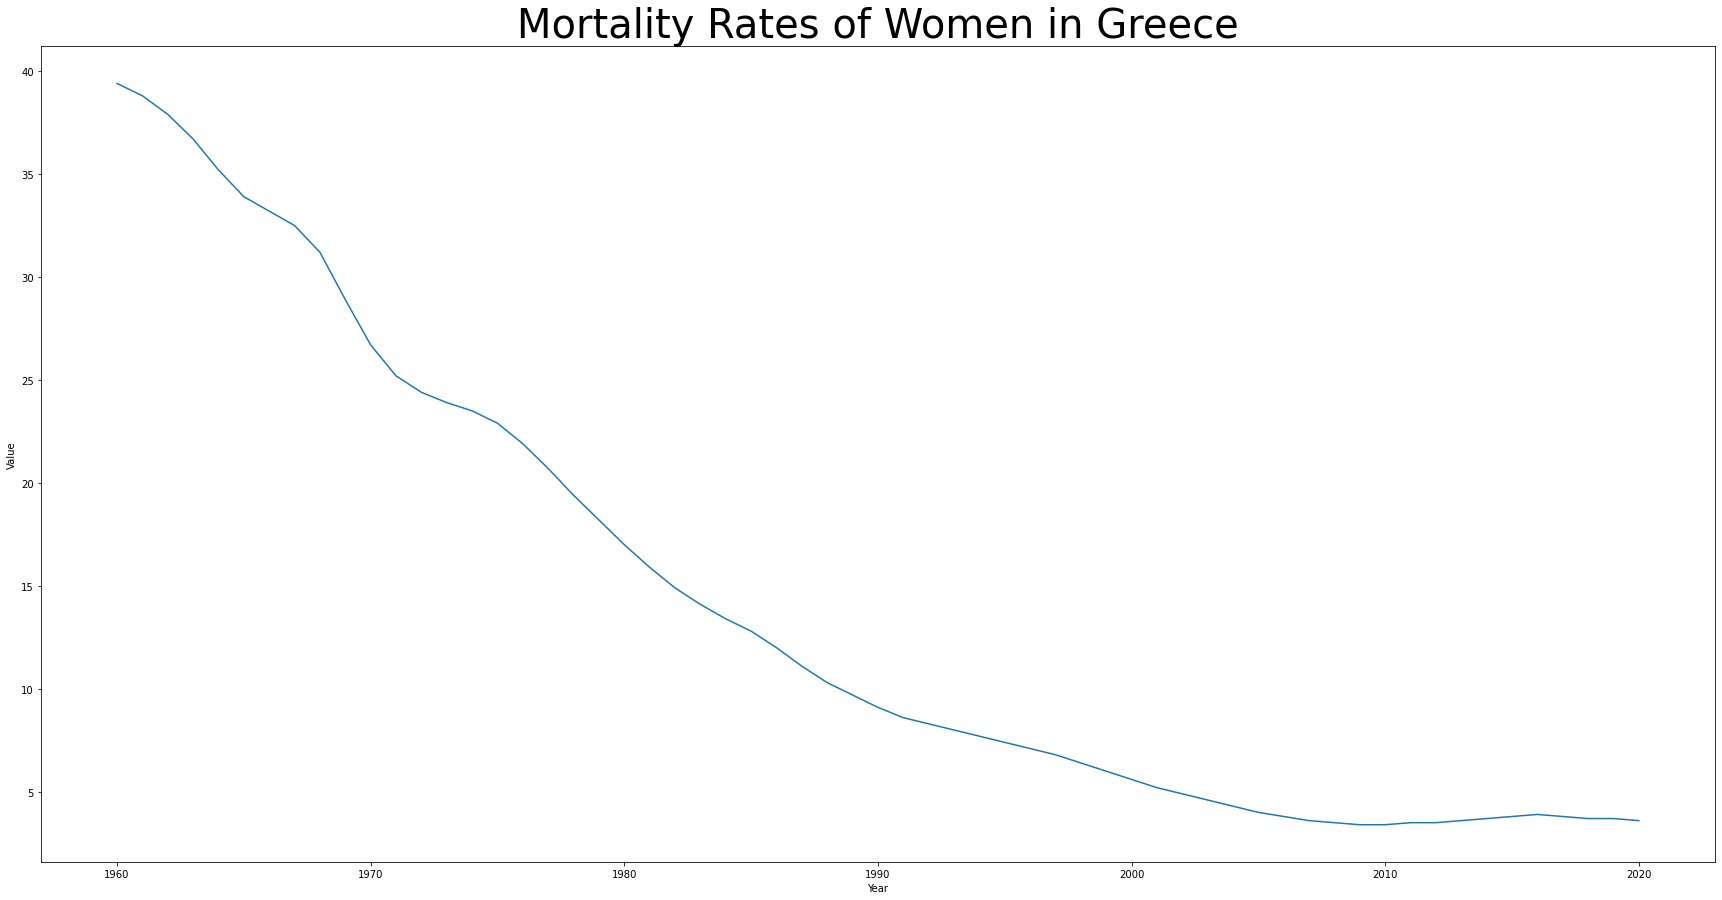

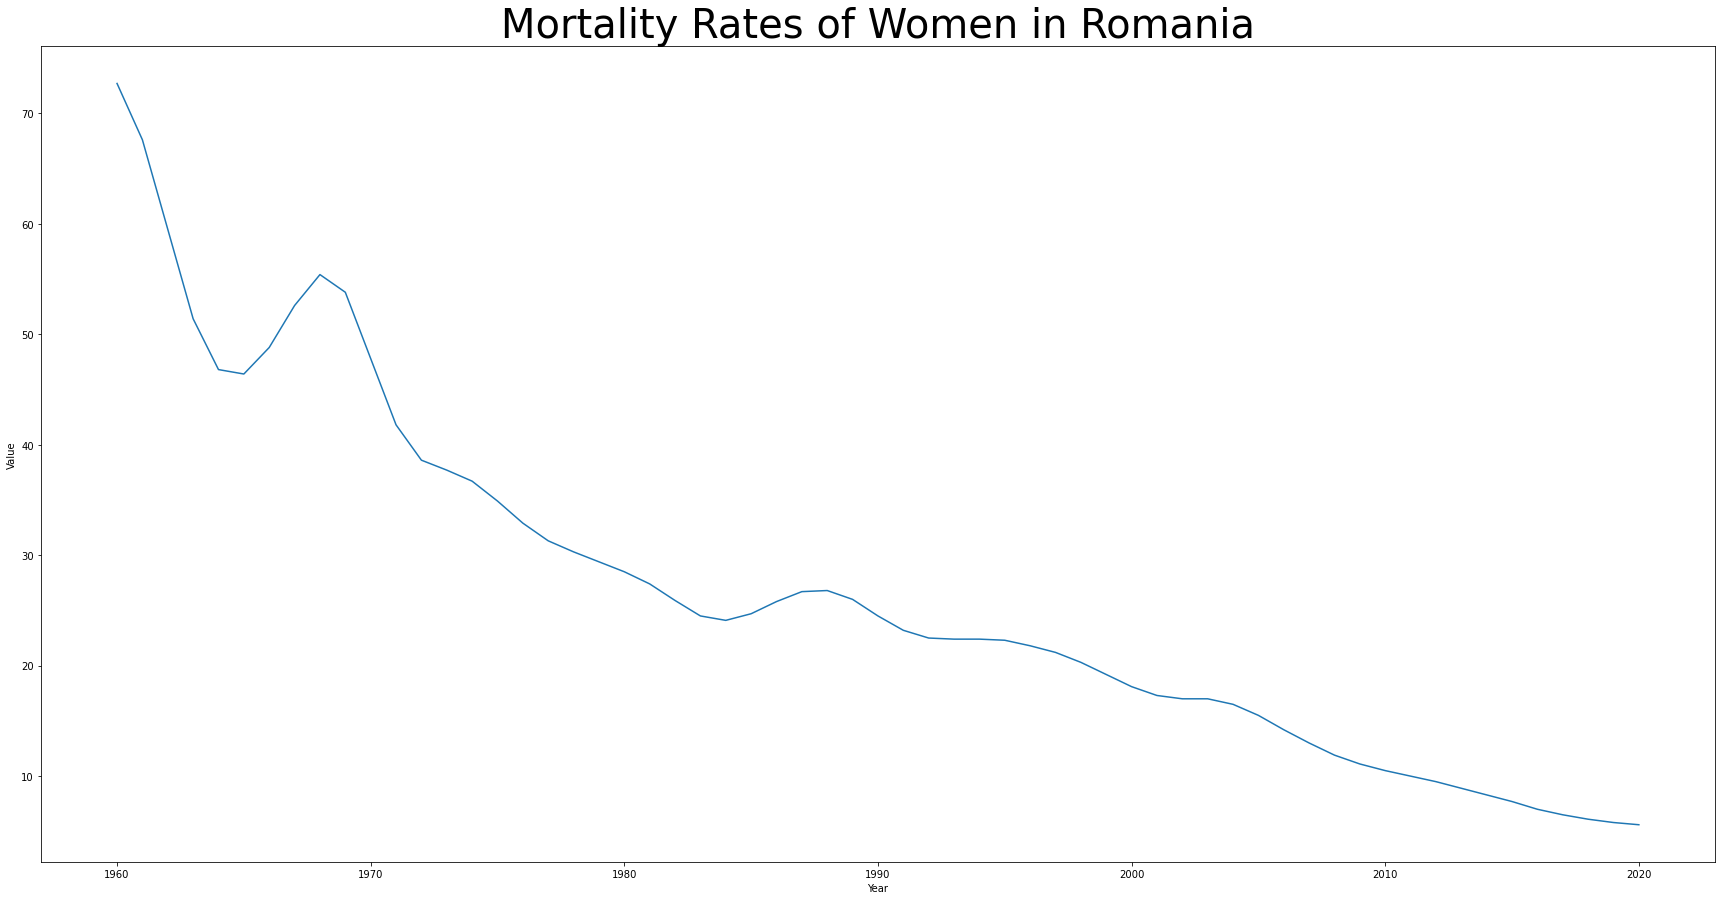

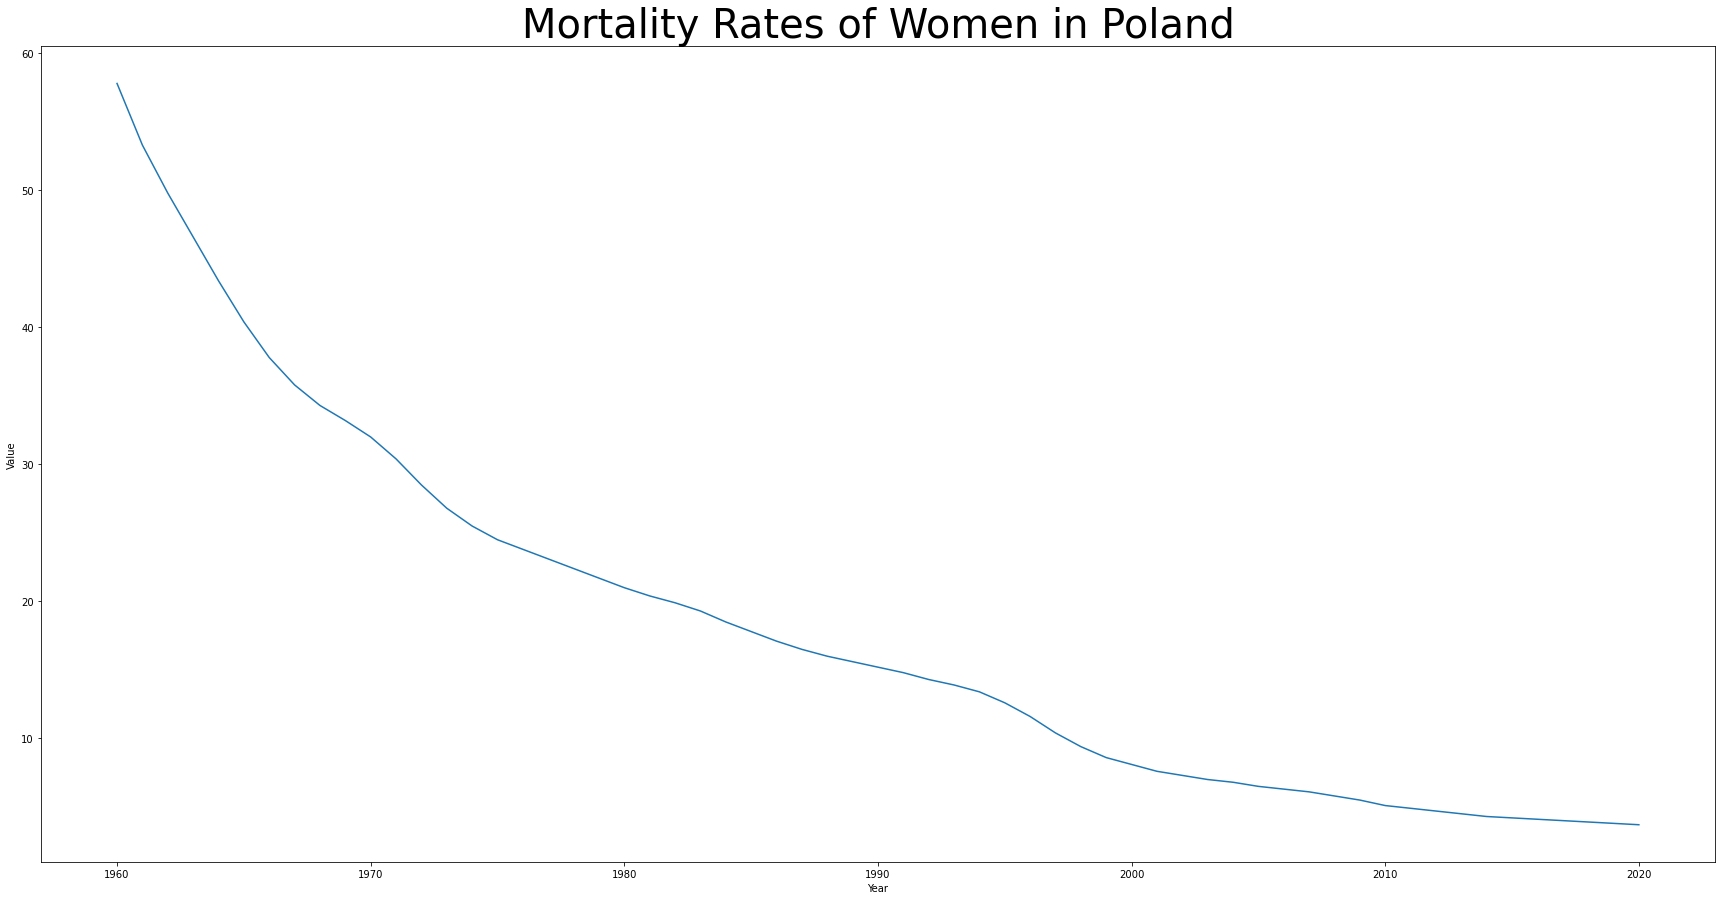

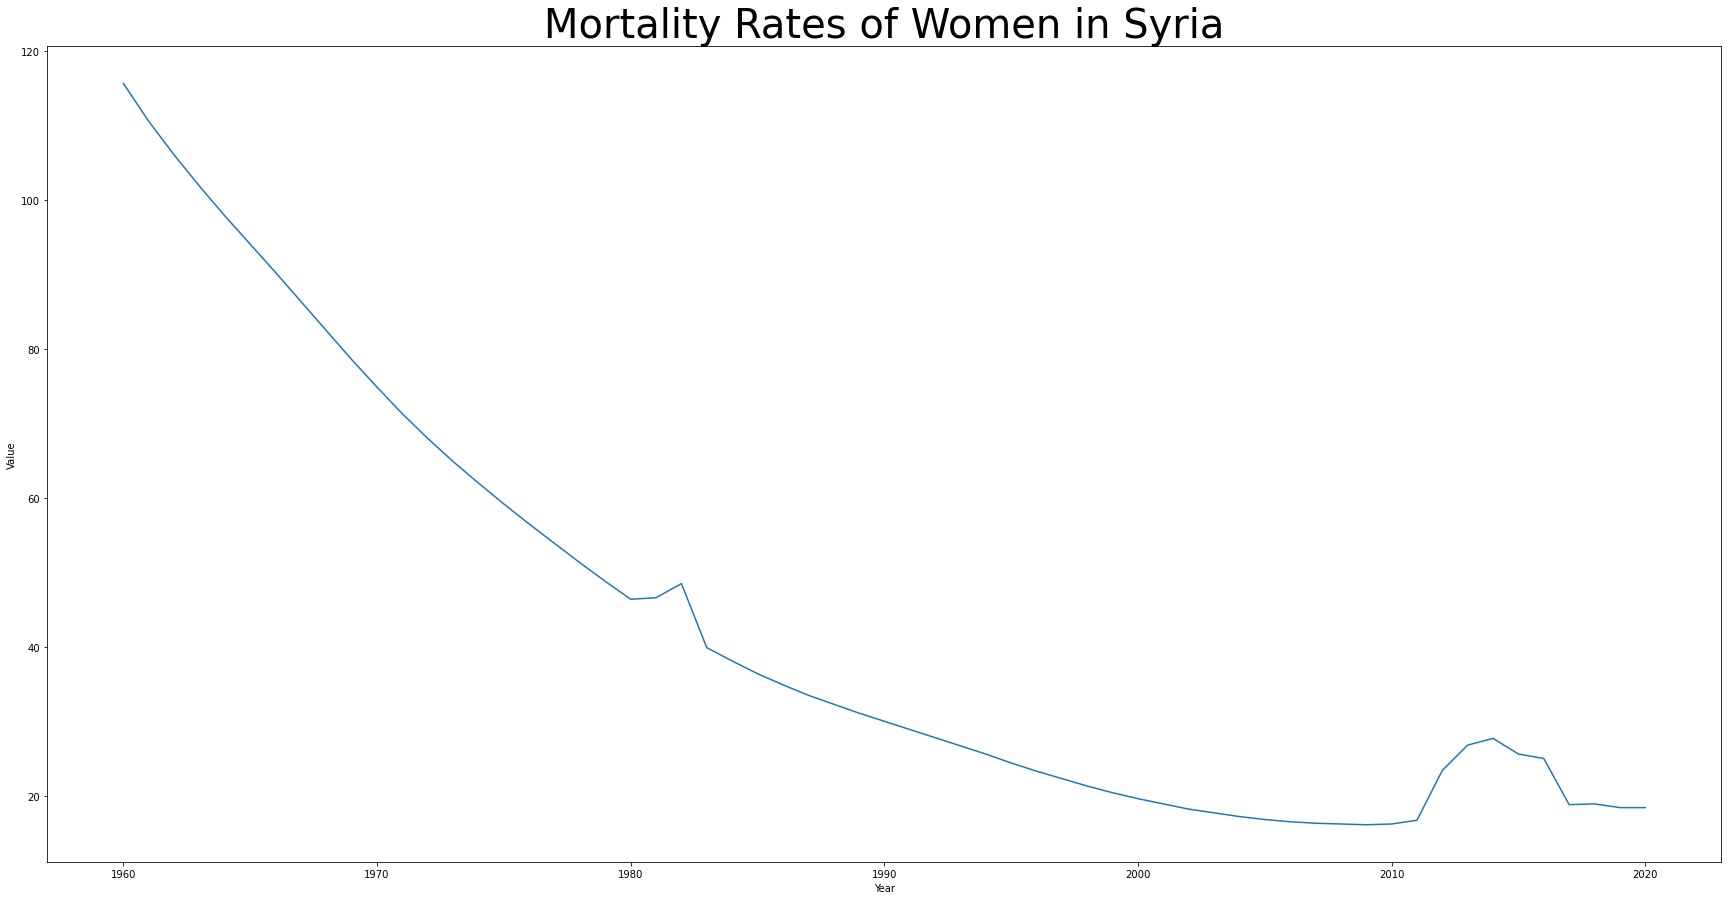

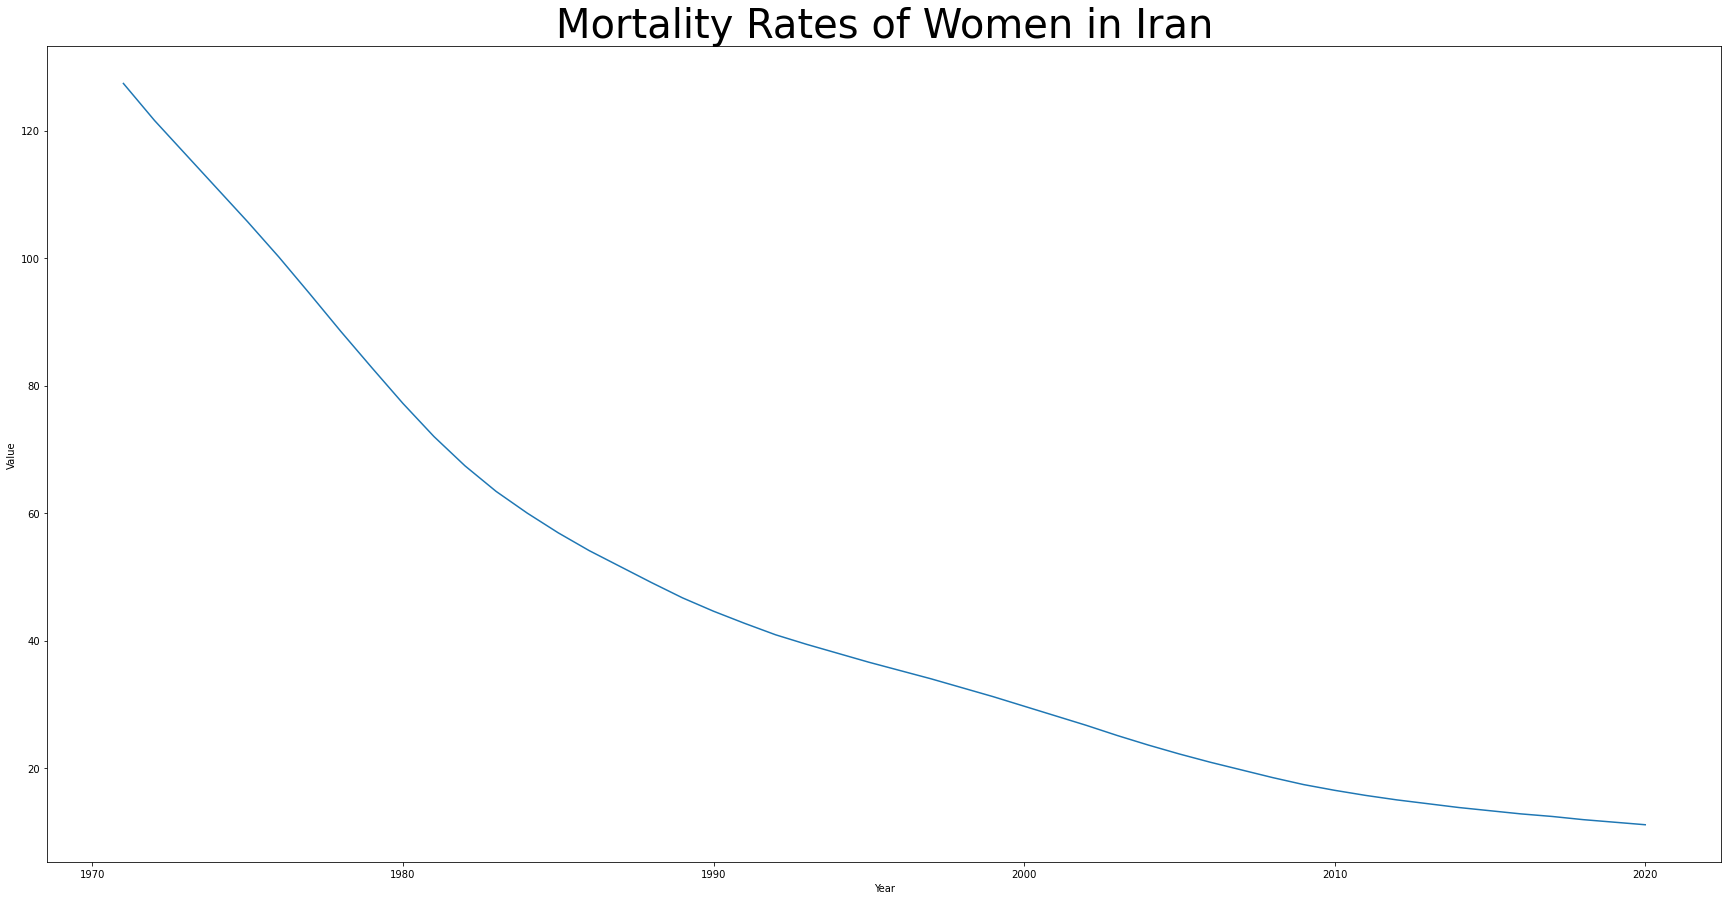

In [247]:
mort_data_grc=xml_to_df(mortality_rate,'Greece')
plot_func(mort_data_grc)
plt.title('Mortality Rates of Women in Greece',fontsize=40)

mort_data_rou=xml_to_df(mortality_rate,'Romania')
plot_func(mort_data_rou)
plt.title('Mortality Rates of Women in Romania',fontsize=40)

mort_data_pol=xml_to_df(mortality_rate,'Poland')
plot_func(mort_data_pol)
plt.title('Mortality Rates of Women in Poland',fontsize=40)

mort_data_syr=xml_to_df(mortality_rate,'Syrian Arab Republic')
plot_func(mort_data_syr)
plt.title('Mortality Rates of Women in Syria',fontsize=40)

mort_data_irn=xml_to_df(mortality_rate,'Iran, Islamic Rep.')
plot_func(mort_data_irn)
plt.title('Mortality Rates of Women in Iran',fontsize=40)

Text(0.5, 1.0, 'Gini Index in Iran')

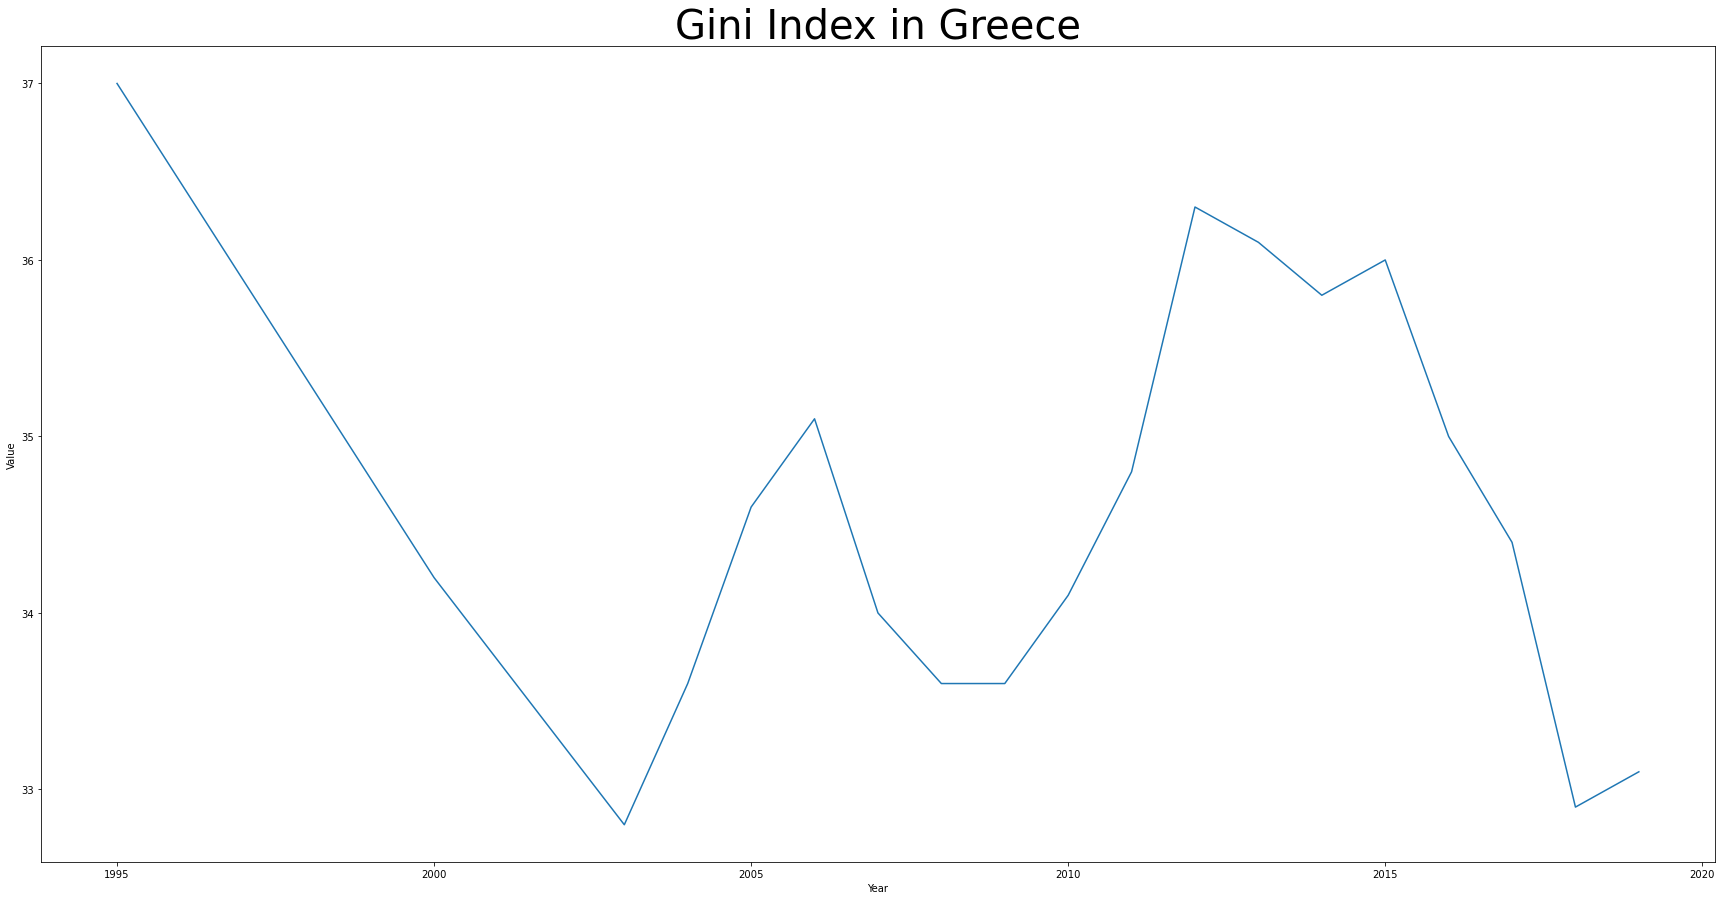

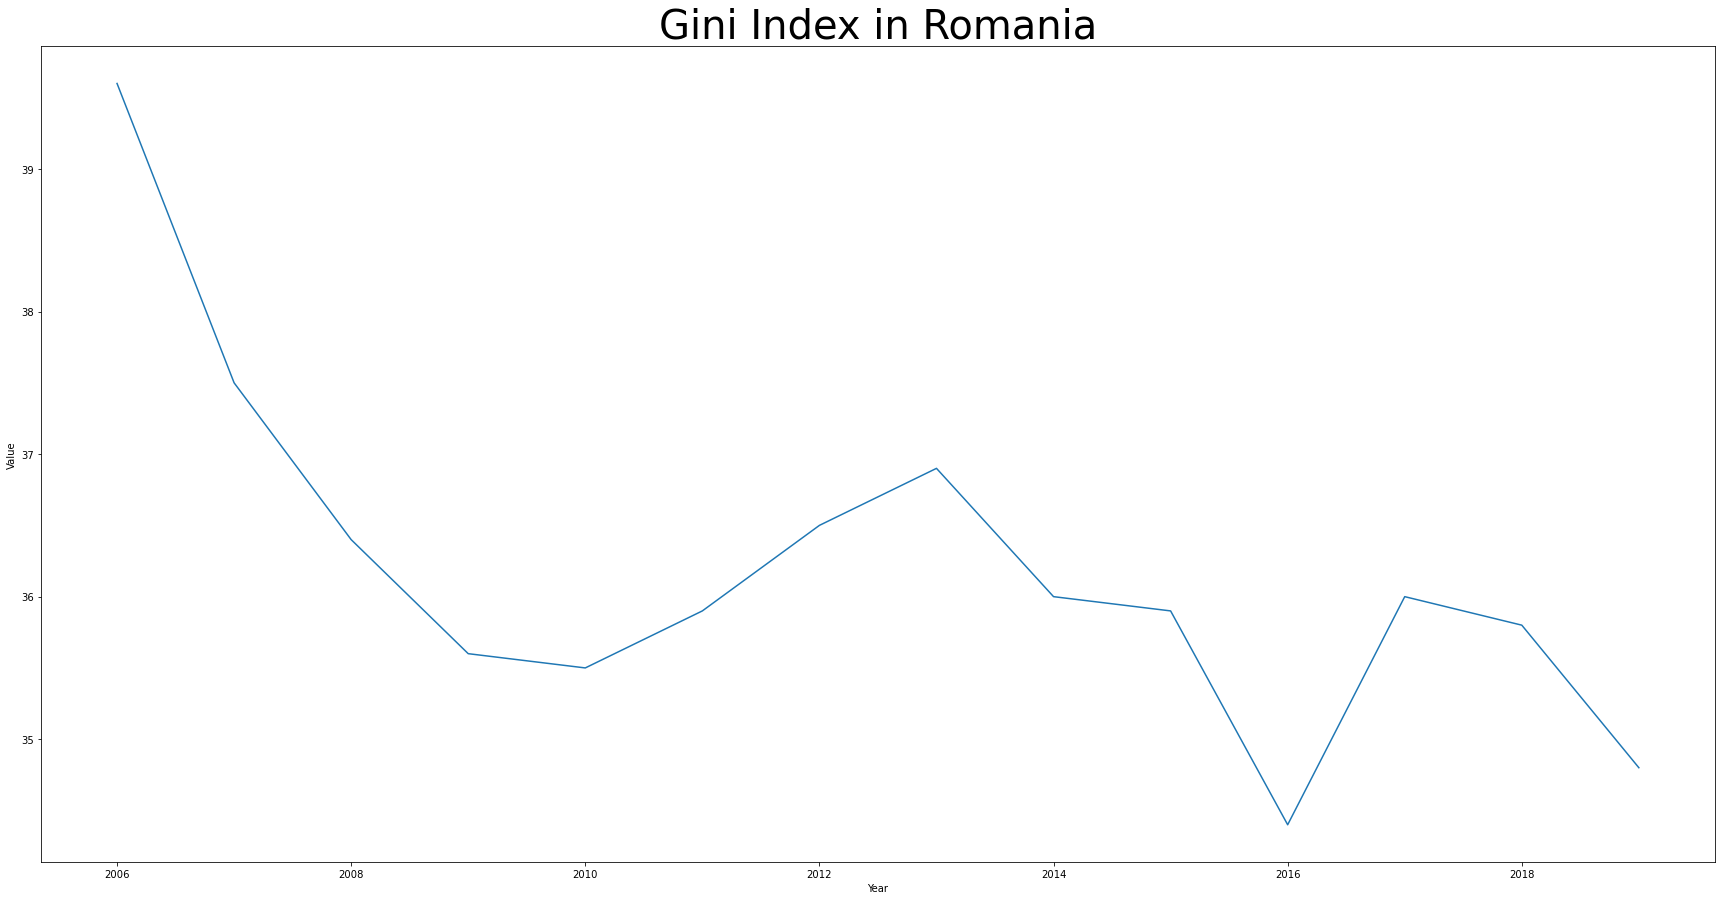

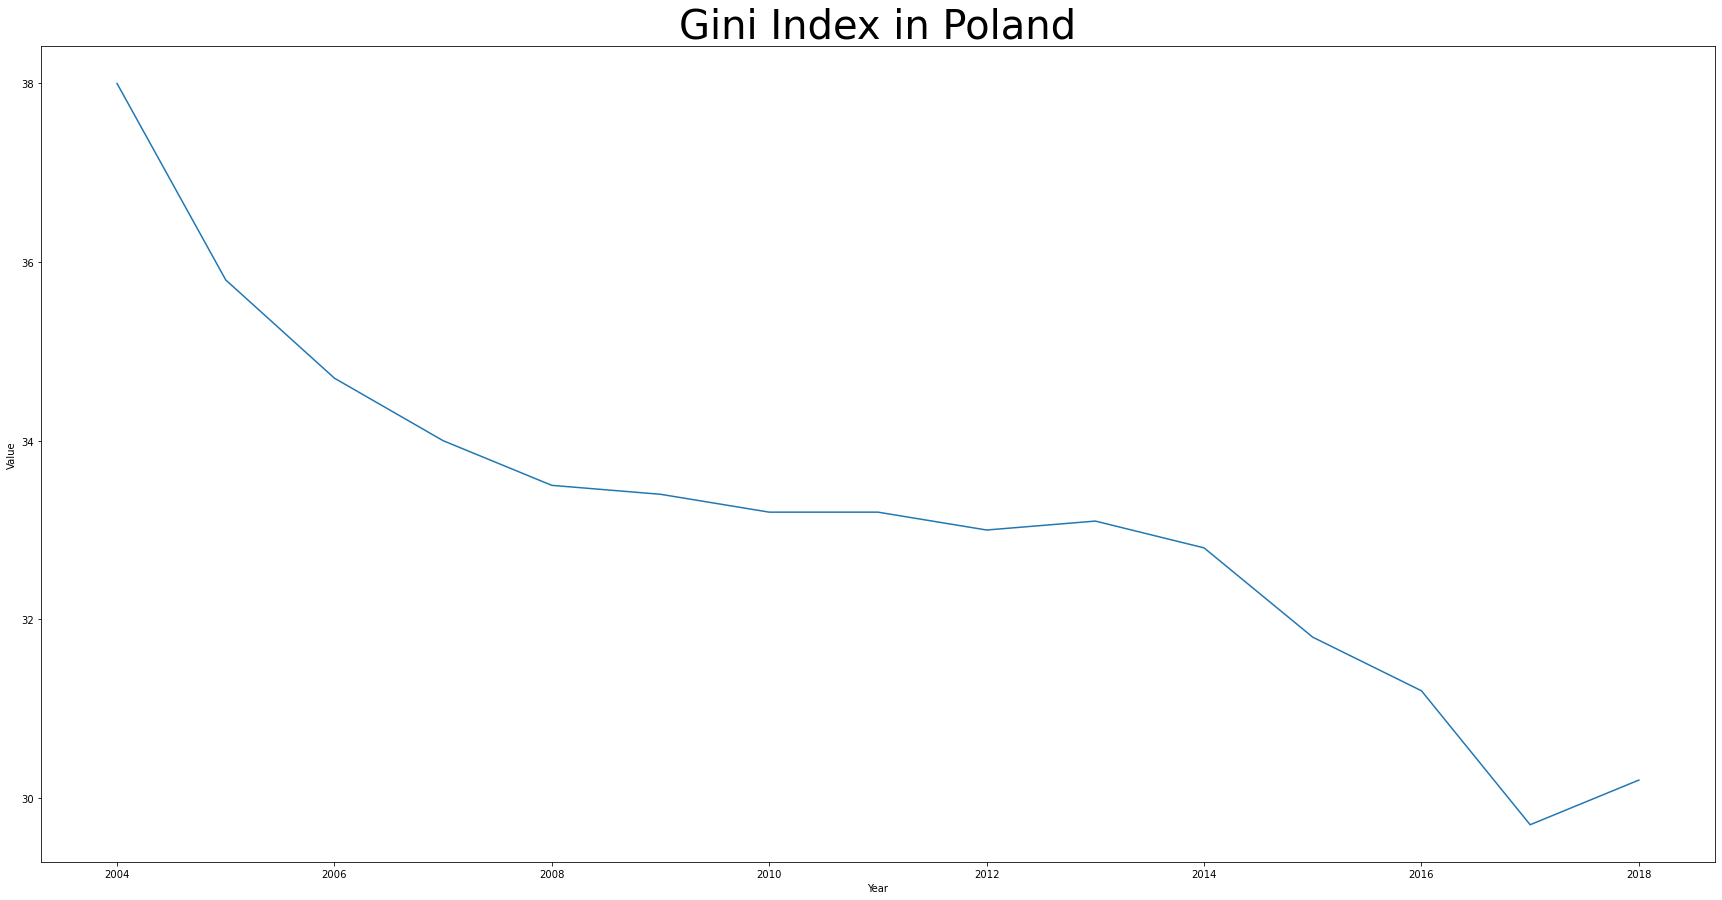

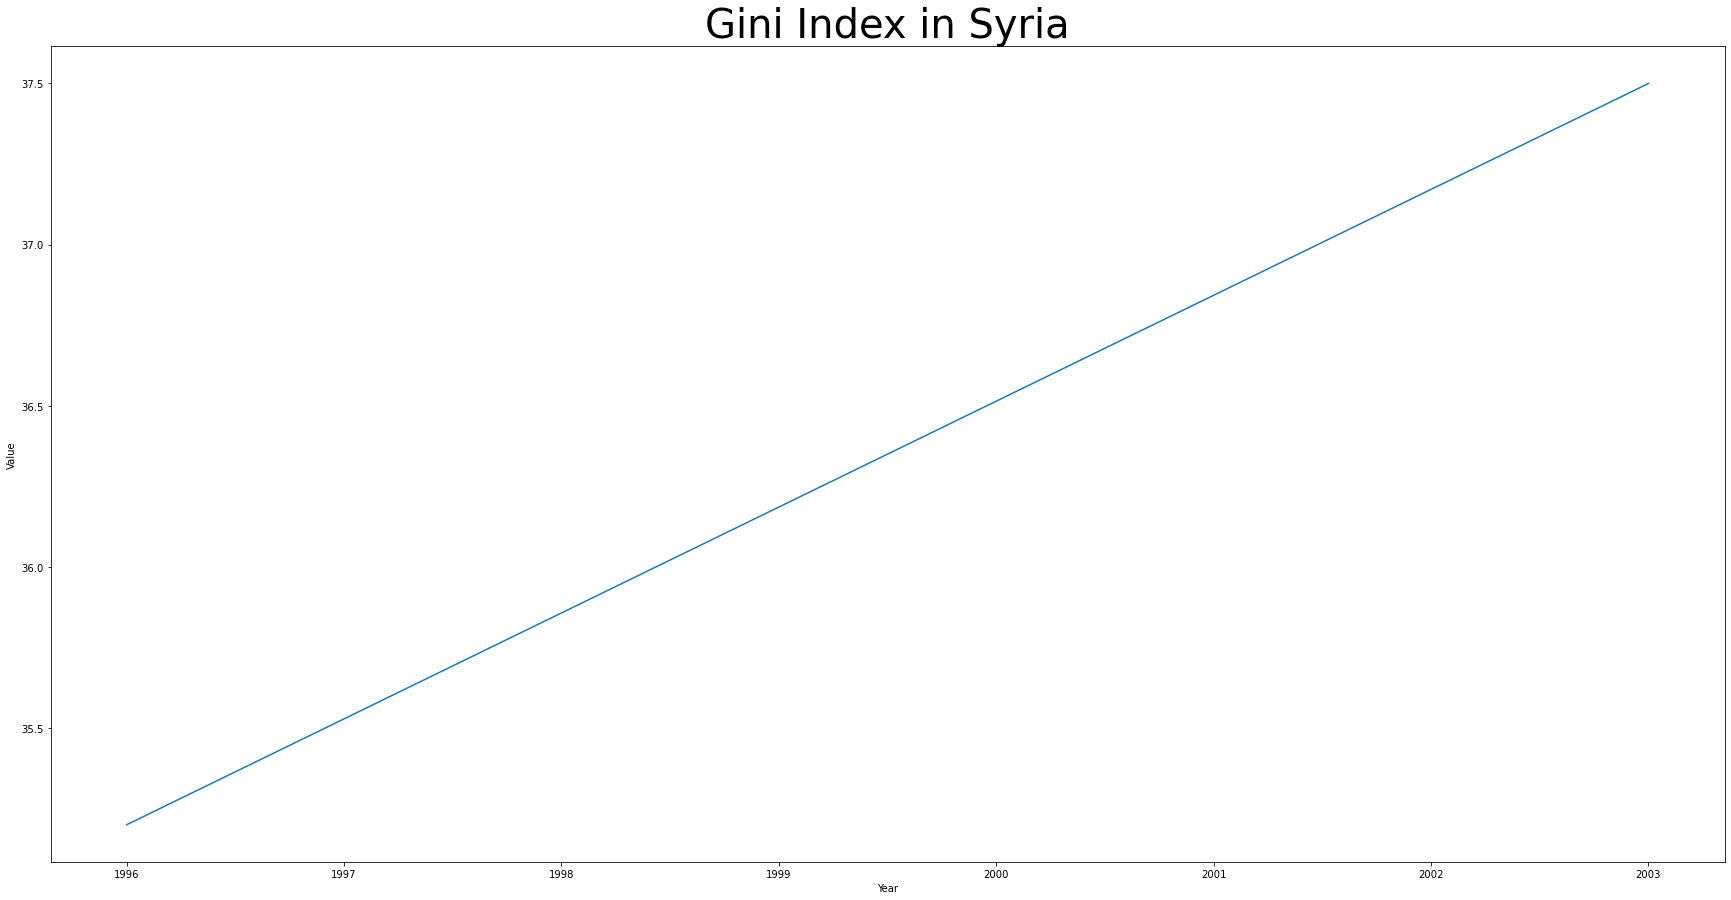

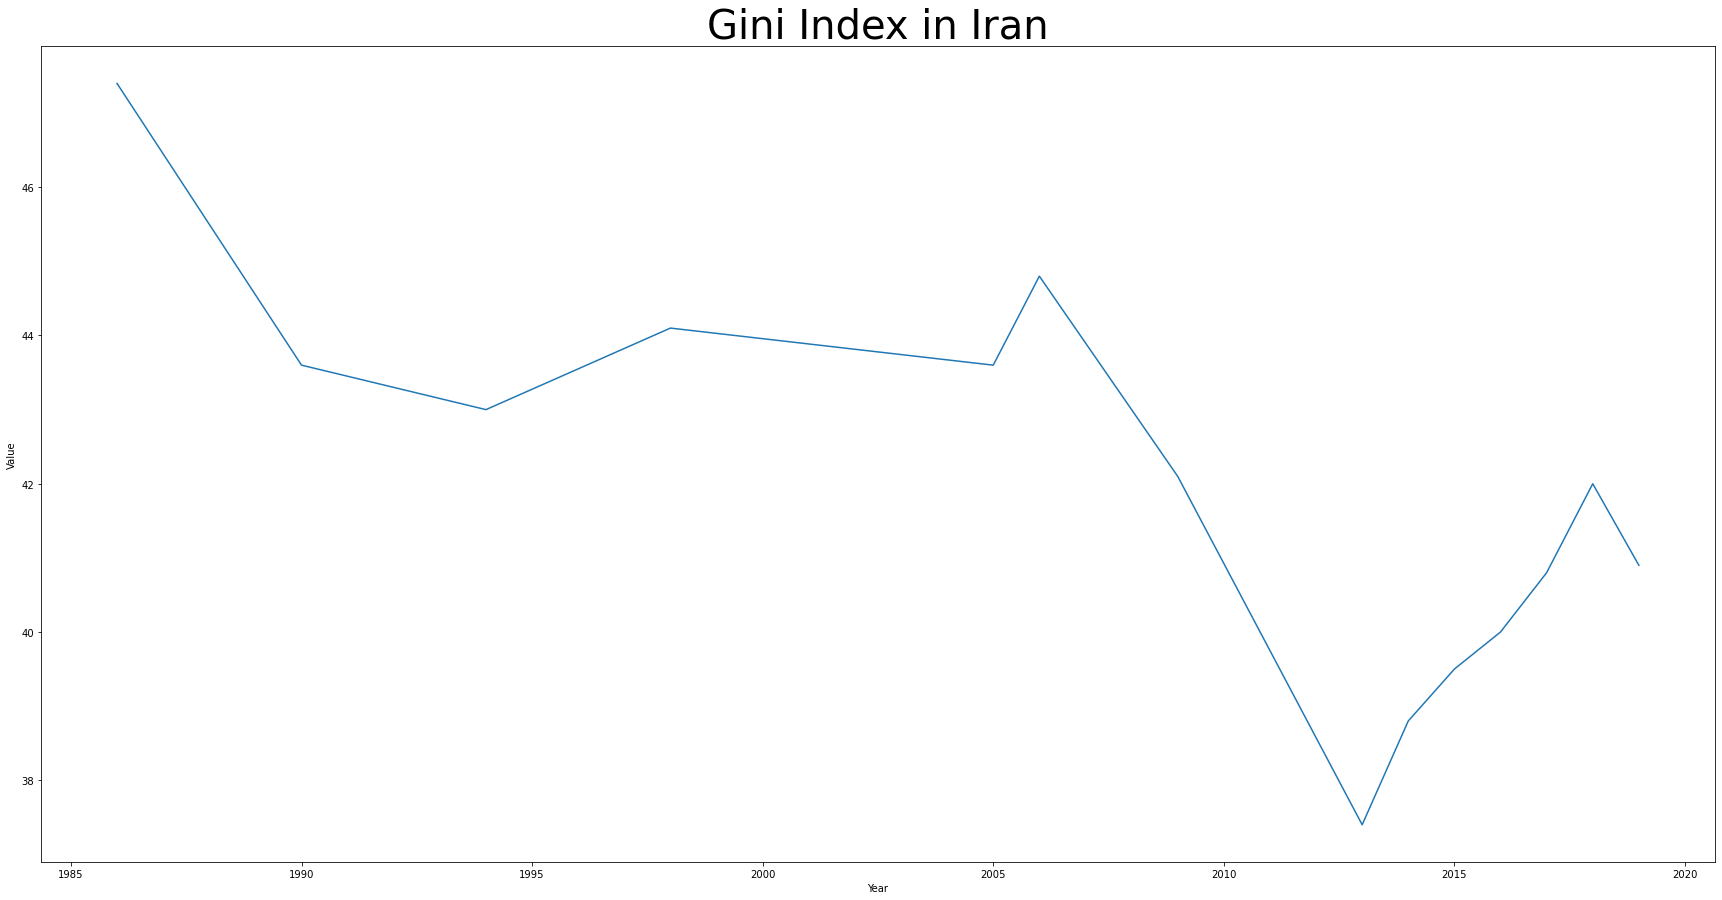

In [248]:
gini_data_grc=xml_to_df(gini_index,'Greece')
plot_func(gini_data_grc)
plt.title('Gini Index in Greece',fontsize=40)

gini_data_rou=xml_to_df(gini_index,'Romania')
plot_func(gini_data_rou)
plt.title('Gini Index in Romania',fontsize=40)

gini_data_pol=xml_to_df(gini_index,'Poland')
plot_func(gini_data_pol)
plt.title('Gini Index in Poland',fontsize=40)

gini_data_syr=xml_to_df(gini_index,'Syrian Arab Republic')
plot_func(gini_data_syr)
plt.title('Gini Index in Syria',fontsize=40)

gini_data_irn=xml_to_df(gini_index,'Iran, Islamic Rep.')
plot_func(gini_data_irn)
plt.title('Gini Index in Iran',fontsize=40)

Defining a **scatter_plot** function is helpful when you have 2 different data frames you want to compare using a scatter plot. Again, it is year vs value for 2 datas.

In [260]:
def scatter_plot(data1,data2):
    x1=data1['Year']
    y1=data1['Value']
    x2=data2['Year']
    y2=data2['Value']
    plt.scatter(x1, y1, c ="pink",
            linewidths = 1,
            marker ="*",
            edgecolor ="purple",
            s = 50)
 
    plt.scatter(x2, y2, c ="yellow",
            linewidths = 1,
            marker =".",
            edgecolor ="blue",
            s = 50)

# Q1.3 Literacy Rate vs Mortality Rate

The Literacy Rate vs Mortality Rate in Turkey scatter plot is given below, with the help of the scatter_plot function defined. While the literacy rate for women is mostly increasing, the mortality rate for children is decreasing. Aroung 1990, they have similar values.

Text(0.5, 1.0, 'Literacity Rate vs Mortality Rate in Turkey')

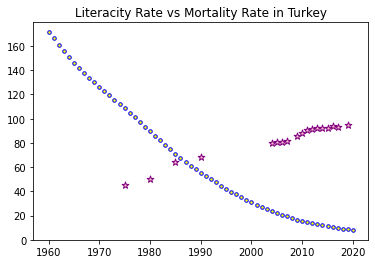

In [261]:
scatter_plot(lit_data_tr,mort_data_tr)
plt.title('Literacity Rate vs Mortality Rate in Turkey')

# Q1.4 Literacy Rate vs Gini Index

The Literacy Rate vs Gini index in Turkey scatter plot is given below. While the literacy rate for women is mostly increasing and changing, the gini index values are more stable.

Text(0.5, 1.0, 'Literacity Rate vs Gini Index in Turkey')

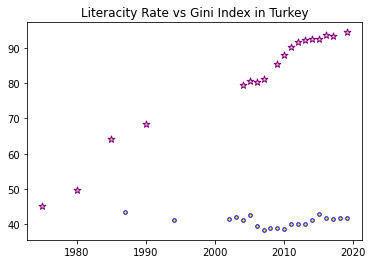

In [255]:
scatter_plot(lit_data_tr,gini_data_tr)
plt.title('Literacity Rate vs Gini Index in Turkey')

# Q1.5 Mortality Rate vs Gini Index

The Mortality Rate vs Gini index in Turkey scatter plot is given below. The mortality rate for children looks like decreasing, the gini index is more stable also values are not available for earlier years in the plot.

Text(0.5, 1.0, 'Mortality Rate vs Gini Index in Turkey')

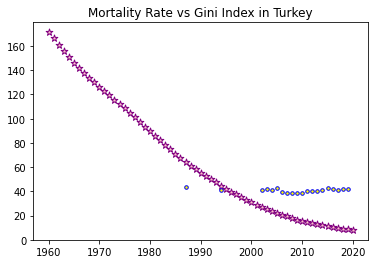

In [257]:
scatter_plot(mort_data_tr,gini_data_tr)
plt.title('Mortality Rate vs Gini Index in Turkey')

## Question 2

Use Istanbul Municipality Data Server to retrieve the data on [Rail Transportation Data](https://data.ibb.gov.tr/dataset/yas-grubuna-gore-rayli-sistemler-istasyon-bazli-yolcu-ve-yolculuk-sayilari).

1. Explore the dataset and explain each column.
2. Notice that the longitude and lattitude data is not recorded correctly. However, it is easy to correct the data. Explain how you would correct it and then write a function to correct it.
3. Notice that the passenger information is split according to age brackets. Find the total number of passengers for each station ~~in each month~~ and store it in a pandas dataframe. Then plot it on a map of Istanbul. Use disks of different sizes depending on the total number of passengers.
4. Write a function that accepts the age bracket as input (<20, 20-30, 30-60, 60+, unknown) and returns a probability an array of maps (dictionaries) of the form

    {Station Name: probability that the specific age bracket uses the station}
5. The return value for the function you wrote above is a probability distribution on the set of stations, i.e. the usage patterns of different age brackets. Figure out which stations are favored by each age bracket.
6. How do we check that the usage patterns for different age brackets are different? Use your idea to write a code to check for these differences.

# Q2.1 Understanding the Data
The data gives information about rail transportation in Istanbul. We can see which age groups have used a certain station & line, how many passeges and passengers there are, what is the transaction month & date. Which town is that station located in along with it's longitude and latitude. 

In [2]:
with urlopen ('https://data.ibb.gov.tr/dataset/d3df8db4-1ac6-4bfe-8896-7ec1159caa2b/resource/7aec630d-2757-4da0-97f1-71b140abd818/download/2021-yl-ya-grubuna-gore-rayl-sistemler-istasyon-bazl-yolcu-ve-yolculuk-saylar.xlsx') as url:
    data = pd.read_excel(url.read())
data

,passage_cnt,passanger_cnt,transaction_year,transaction_month,line,station_name,station_number,town,latitude,longitude,Age-Group
0,7.424,4.227,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,20-30
1,18.374,9.479,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,30-60
2,3.190,1.430,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,60+
3,949.000,469.000,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,<20
4,8.673,4.222,2.021,1,F1-TAKSIM-KABATAS FUNIKILER HATTI,KABATAS,KTS-TKS,Beyoğlu,410340555555556,289920277777778,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
17077,9.295,8.209,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,20-30
17078,10.554,9.361,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,30-60
17079,1.552,1.235,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,60+
17080,3.319,2.632,2.021,12,TF2-TELEFERIK EYUP PIYERLOTI,Pierloti,PLT-EYU,EyüpSultan,410533333333333,289335555555556,<20


# Q2.2 Correcting Longitude and Latitude
The longitude and latitude retrieved from the data does not look correct. It is numerically 10^13 times bigger than what it should be originally. In order to get rid of unstable data types I turn them to numeric and then do the calculation. fix_data fixes either the longitude or the latitude as the user wishes.

In [3]:
def fix_data(data,col):
    data[col] = pd.to_numeric(data[col], errors='coerce')
    for i in range(len(data)):
        data[col][i]=data[col][i]/pow(10,13)

In [4]:
fix_data(data,'longitude');
fix_data(data,'latitude');

<ipython-input-3-b6c1f0c2220b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i]=data[col][i]/pow(10,13)


# Q2.3 Total Passengers for Each Station
Before starting the total passenger count, I fix the passenger count data by multiplying it with 10^3 as it seems necessary.

In [7]:
for i in range(len(data)):
    data['passanger_cnt'][i]=data['passanger_cnt'][i]*pow(10,3)

<ipython-input-7-6c1ad82c498f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['passanger_cnt'][i]=data['passanger_cnt'][i]*pow(10,3)


I group the data by the station names,latitude and longitude, then with .sum() I am able to calculate the total passenger count for each station. The index is set as the station name but I want it as a column, so I reset the index and rename the columns.

In [14]:
a=data.groupby(['station_name','latitude','longitude'])['passanger_cnt'].sum()
df = a.to_frame().reset_index()
df.rename(columns = {'index':'new_index',
                     'station_name':'Station Name',
                     'passanger_cnt':'Passenger Count',
                     'latitude':'Latitude',
                     'longitude':'Longitude'},
        inplace = True)
df

,Station Name,Latitude,Longitude,Passenger Count
0,4 Levent 2 Güney,41.085722,29.006861,978156.0
1,4 Levent Kuzey,41.085722,29.006861,1253533.0
2,AKSARAY,41.011833,28.947889,2445726.0
3,AKSARAY 1,41.011833,28.947889,805858.0
4,ALTINŞEHİR,41.016694,29.140111,2832002.0
...,...,...,...,...
240,Şehitlik,41.034278,28.928333,1409887.0
241,Şişhane Güney,41.028722,28.974889,1005997.0
242,Şişhane Kuzey,41.028722,28.974889,1383547.0
243,Şişli 2 Kuzey,41.063889,28.992139,3515905.0


Below, is the scatter map. Points represent stations stations and when hovering over them name, longitude, latitude and passenger count information is given. Disk sizes are made according to total passenger count in that station.
> Reference for the code (modified): https://plotly.com/python/mapbox-layers/

*The map is not visible, so I also added it as a png.*

In [31]:
fig = px.scatter_mapbox(df, lat="Latitude", lon="Longitude", hover_name="Station Name",size="Passenger Count"
                        ,color_discrete_sequence=["red"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

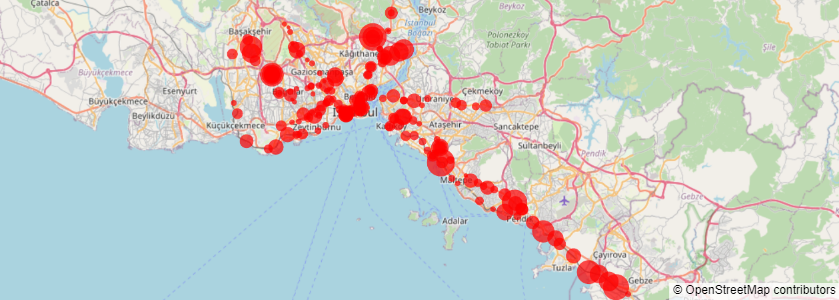

# Q2.4 Probability Function
The probability that a specific age bracket uses a certain station is calculated with the age_prob function I defined. It takes the age bracket from the user. And checks if the current station the loop is searching and the input age matches the rows in the original data. If so, the passenger count for that specific age bracket gets appended to a counter array. 

Before exiting the outer for loop, the probability is calculted (number of passengers that are in that age bracket for station x / total number of passengers for station x) and set as the value and the station name is set as the key and they both get added to the dictionary.

In [ ]:
def age_prob(age):
    prob_dicts={}
    keys=range(len(df))
    for i in range(len(df)):
        counter=[]
        for j in range(len(data)):
            if data['station_name'][j]==df['Station Name'][i] and data['Age-Group'][j]==age:
                counter.append(data['passanger_cnt'][j])
                
        prob_dicts[df['Station Name'][i]]=[sum(counter)/df['Passenger Count'][i]]
        
    return prob_dicts

# Q2.5 Most Favored Station
favored_station function takes the age bracket as input and then with the help of the age_prob function defined previously, obtains a dictionary with probability values. With the max function, we obtain the station name with the highest probability for that age bracket. The result gets printed.

Below, I tested the favored_station function with all age bracket types.

In [ ]:
def favored_station(agebracket):
    d = age_prob(agebracket)
    st = max(d, key=d.get)
    print(st,'Station is favored the most by',agebracket,'year olds.')

In [ ]:
favored_station('<20')
favored_station('20-30')
favored_station('30-60')
favored_station('60+')
favored_station('unknown')

# Q2.6 Usage patterns

When I think of usage pattern for age brackets, I think of rail transportation lines, passage counts etc. Maybe creating a scatter plot for each category that can be counted as 'usage' to see which age bracket is crowding the space might be solution.


# Question 3

For this question use Yahoo Finance API via [yfinance](https://pypi.org/project/yfinance/) library. Retrieve the data for Microsoft [MSFT], Apple [AAPL] and NASDAQ-100 [NDX]. from January 1, 2000.

1. Calculate the log of each series, and then calculate the first derivative of the result. What you got is called the [log-return](https://core.ac.uk/download/pdf/161062652.pdf) of each series. 
2. Merge the series you obtain in Step 1 into a single pandas dataframe.
3. Plot the histograms of results you obtained above (use 10 bins).
4. Plot all three series in a single plot to compare. Do you see a relationship? 
5. How do we see if there are any correlations between these series? What is the statistically correct way of testing it? Find the right statistical test and measure all three correlations.

I start by retrieving the data using pdr.get_data_yahoo, a function from the yfinance library that makes work process easier. I clarify which data I want to retrieve and also pick a start and only get data starting from January 1,2000. 

In [114]:
yf.pdr_override() 

msft = pdr.get_data_yahoo("MSFT", start="2000-01-01")
msft

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,58.687500,59.312500,56.000000,58.281250,36.555367,53228400
2000-01-04 00:00:00-05:00,56.781250,58.562500,56.125000,56.312500,35.320538,54119000
2000-01-05 00:00:00-05:00,55.562500,58.187500,54.687500,56.906250,35.692944,64059600
2000-01-06 00:00:00-05:00,56.093750,56.937500,54.187500,55.000000,34.497295,54976600
2000-01-07 00:00:00-05:00,54.312500,56.125000,53.656250,55.718750,34.948120,62013600
...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,235.410004,241.610001,234.660004,240.740005,240.740005,28880400
2022-10-04 00:00:00-04:00,245.089996,250.360001,244.979996,248.880005,248.880005,34888400
2022-10-05 00:00:00-04:00,245.990005,250.580002,244.100006,249.199997,249.199997,20347100


In [115]:
aapl = pdr.get_data_yahoo("AAPL", start="2000-01-01")
aapl

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,0.936384,1.004464,0.907924,0.999442,0.853356,535796800
2000-01-04 00:00:00-05:00,0.966518,0.987723,0.903460,0.915179,0.781409,512377600
2000-01-05 00:00:00-05:00,0.926339,0.987165,0.919643,0.928571,0.792844,778321600
2000-01-06 00:00:00-05:00,0.947545,0.955357,0.848214,0.848214,0.724232,767972800
2000-01-07 00:00:00-05:00,0.861607,0.901786,0.852679,0.888393,0.758538,460734400
...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,138.210007,143.070007,137.690002,142.449997,142.449997,114311700
2022-10-04 00:00:00-04:00,145.029999,146.220001,144.259995,146.100006,146.100006,87830100
2022-10-05 00:00:00-04:00,144.070007,147.380005,143.009995,146.399994,146.399994,79471000


In [116]:
ndx = pdr.get_data_yahoo("NDX", start="2000-01-01")
ndx

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03 00:00:00-05:00,3755.739990,3836.860107,3643.250000,3790.550049,3790.550049,1510070000
2000-01-04 00:00:00-05:00,3766.570068,3766.570068,3542.729980,3546.199951,3546.199951,1511840000
2000-01-05 00:00:00-05:00,3543.129883,3576.169922,3371.750000,3507.310059,3507.310059,1735670000
2000-01-06 00:00:00-05:00,3488.310059,3513.550049,3334.020020,3340.810059,3340.810059,1598320000
2000-01-07 00:00:00-05:00,3337.260010,3529.750000,3314.750000,3529.600098,3529.600098,1634930000
...,...,...,...,...,...,...
2022-10-03 00:00:00-04:00,11059.169922,11296.429688,10985.009766,11229.730469,11229.730469,4415440000
2022-10-04 00:00:00-04:00,11477.849609,11609.250000,11462.370117,11582.540039,11582.540039,5004780000
2022-10-05 00:00:00-04:00,11429.469727,11647.620117,11312.519531,11573.179688,11573.179688,4091860000


# Q3.1 Log-Return Values
Doing my calculations for the closing values with the help of the numpy library. First I calculate the log and then get the first derivative using np.gradient. At the end, I have 3 arrays from 3 datas. 

In [117]:
log1 = np.log(msft['Close'])
logreturn1 = np.gradient(log1)

log2 = np.log(aapl['Close'])
logreturn2 = np.gradient(log2)

log3 = np.log(ndx['Close'])
logreturn3 = np.gradient(log3)

# Q3.2 Merging Series
Now that I have 3 numpy arrays with the same concept (concept meaning they are all log-returns of closing values for each data), I create an empty pandas data frame with column titles. After converting numpy arrays into lists, they are able to fill out the empty data frame df. 

I preferred to see the dates as the index.

In [90]:
df = pd.DataFrame(columns=['Log Return MSFT','Log Return AAPL','Log Return NDX'])
df['Log Return MSFT'] = logreturn1.tolist()
df['Log Return AAPL'] = logreturn2.tolist()
df['Log Return NDX'] = logreturn3.tolist()
df = df.set_index(msft.index)

In [91]:
df

,Log Return MSFT,Log Return AAPL,Log Return NDX
Date,,,
2000-01-03 00:00:00-05:00,-0.034364,-0.088077,-0.066635
2000-01-04 00:00:00-05:00,-0.011938,-0.036775,-0.038831
2000-01-05 00:00:00-05:00,-0.011792,-0.037993,-0.029832
2000-01-06 00:00:00-05:00,-0.010544,-0.022116,0.003168
2000-01-07 00:00:00-05:00,0.010124,0.014268,0.053407
...,...,...,...
2022-10-03 00:00:00-04:00,0.033181,0.027795,0.027112
2022-10-04 00:00:00-04:00,0.017269,0.013676,0.015063
2022-10-05 00:00:00-04:00,-0.004217,-0.002298,-0.004207


# Q3.3 Histogram
Using 10 bins, plt.hist allows me to create 3 seperate histograms for each series(column) in the data frame. They all have the most values closer to 0.

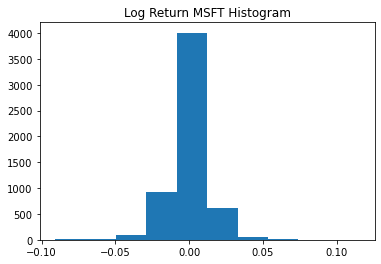

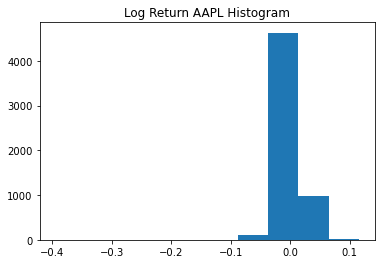

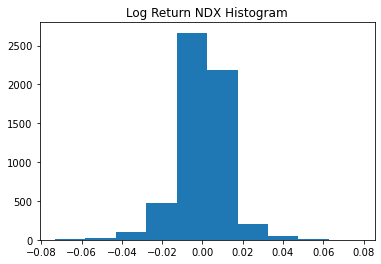

In [105]:
plt.hist(df['Log Return MSFT'], bins=10)
plt.title('Log Return MSFT Histogram')
plt.show() 

plt.hist(df['Log Return AAPL'], bins=10)
plt.title('Log Return AAPL Histogram')
plt.show() 

plt.hist(df['Log Return NDX'], bins=10)
plt.title('Log Return NDX Histogram')
plt.show() 

# Q3.4 Plotting Series
Plotting 3 series together, they all have a wide range around 2008.

<AxesSubplot:xlabel='Date'>

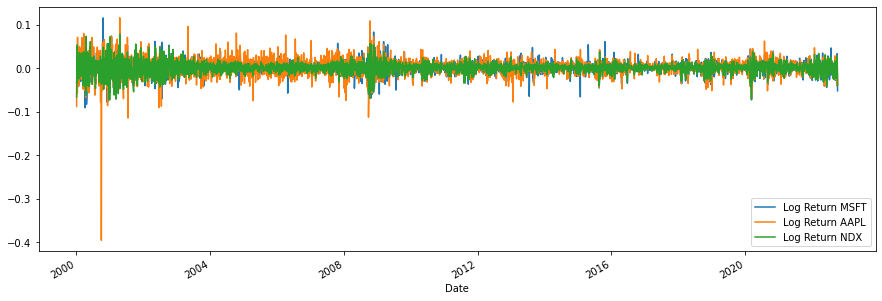

In [112]:
df['Log Return MSFT'].plot(figsize=(15,5),legend='k')
df['Log Return AAPL'].plot(figsize=(15,5),legend='l')
df['Log Return NDX'].plot(figsize=(15,5),legend='m')